<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Paths</a></span><ul class="toc-item"><li><span><a href="#Get-Image-and-PDI-Files-and-Full-Paths" data-toc-modified-id="Get-Image-and-PDI-Files-and-Full-Paths-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get Image and PDI Files and Full Paths</a></span></li><li><span><a href="#Get-range-of-2th-that-has-direct-beam" data-toc-modified-id="Get-range-of-2th-that-has-direct-beam-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Get range of 2th that has direct beam</a></span></li></ul></li><li><span><a href="#Get-Brightest-pixel-in-each-image" data-toc-modified-id="Get-Brightest-pixel-in-each-image-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get Brightest pixel in each image</a></span><ul class="toc-item"><li><span><a href="#Fit-and-plot-individual-images" data-toc-modified-id="Fit-and-plot-individual-images-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fit and plot individual images</a></span></li><li><span><a href="#Fit-all-images" data-toc-modified-id="Fit-all-images-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Fit all images</a></span></li><li><span><a href="#Obtain-poni-file-parameters-from-fits" data-toc-modified-id="Obtain-poni-file-parameters-from-fits-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Obtain poni file parameters from fits</a></span></li><li><span><a href="#Create-PONI-file-from-above" data-toc-modified-id="Create-PONI-file-from-above-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Create PONI file from above</a></span></li><li><span><a href="#Integrate-using-above-Poni-File" data-toc-modified-id="Integrate-using-above-Poni-File-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Integrate using above Poni File</a></span></li><li><span><a href="#Fit-to-get-rot2-and-D" data-toc-modified-id="Fit-to-get-rot2-and-D-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Fit to get rot2 and D</a></span></li></ul></li><li><span><a href="#for-idx,-(img_fname,-img_path)-in-enumerate(img_fpaths.items()):" data-toc-modified-id="for-idx,-(img_fname,-img_path)-in-enumerate(img_fpaths.items()):-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>for idx, (img_fname, img_path) in enumerate(img_fpaths.items()):</a></span></li><li><span><a href="#img-=-read_image_file(img_path,-return_float=True)" data-toc-modified-id="img-=-read_image_file(img_path,-return_float=True)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>img = read_image_file(img_path, return_float=True)</a></span></li><li><span><a href="#img_mean_vals[idx]-=-np.mean(img)" data-toc-modified-id="img_mean_vals[idx]-=-np.mean(img)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>img_mean_vals[idx] = np.mean(img)</a></span></li><li><span><a href="#for-idx,-(img_fname,-img_path)-in-enumerate(img_fpaths.items()):" data-toc-modified-id="for-idx,-(img_fname,-img_path)-in-enumerate(img_fpaths.items()):-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>for idx, (img_fname, img_path) in enumerate(img_fpaths.items()):</a></span></li><li><span><a href="#img-=-read_image_file(img_path,-return_float=True)" data-toc-modified-id="img-=-read_image_file(img_path,-return_float=True)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>img = read_image_file(img_path, return_float=True)</a></span></li><li><span><a href="#img_mean_vals[idx]-=-np.mean(img)" data-toc-modified-id="img_mean_vals[idx]-=-np.mean(img)-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>img_mean_vals[idx] = np.mean(img)</a></span></li></ul></div>

# Imports

In [4]:
%matplotlib notebook

import sys, os, glob, imp, fnmatch, re

from copy import deepcopy

import matplotlib.pyplot as plt
plt.style.use('~/python/mpl_style.txt')

import numpy as np
import scipy

import pandas as pd

from collections import OrderedDict

from PIL import Image
from ipywidgets import *
from IPython.display import display, Image

from scipy.signal import savgol_filter, medfilt2d, medfilt

from lmfit import Model, Parameter
from lmfit.models import LinearModel, GaussianModel, ParabolicModel
#from lmfit_models import PlaneModel, Gaussian2DModel, Pvoigt2DModel, update_param_hints

from mpl_toolkits.axes_grid1 import make_axes_locatable

import scipy.ndimage as ndimage

import pyFAI
from pyFAI.multi_geometry import MultiGeometry
from pyFAI.gui import jupyter
from silx.io.specfile import SpecFile

from joblib import Parallel, delayed
import multiprocessing as mp

sys.path.append('/Users/vthampy/repos/xdart/')
from xdart.utils import get_from_pdi, get_motor_val, query_yes_no
from xdart.utils import read_image_file, smooth_img, get_fit, fit_images_2D

from xdart.modules.pySSRL_bServer.bServer_funcs import specCommand, wait_until_SPECfinished

import time
from itertools import product

# Paths

In [2]:
path = '/Users/v/SSRL_Data/RDA/calibration_test_data/2019_12_19'#09'

spec_path = path
img_path = os.path.join(path)#, 'images')
pdi_path = os.path.join(path)#, 'images')

## Get Image and PDI Files and Full Paths 

In [3]:
spec_file = SpecFile( os.path.join(spec_path, 'directbeam_20191219') )#''direct_beam_full') ) #LaB6_2

img_fnames = sorted(fnmatch.filter(os.listdir(img_path), '*directbeam_20191219_scan2*.raw')) # '*direct_beam_full_scan1*.raw'))
pdi_fnames = [f'{img_fname}.pdi' for img_fname in img_fnames
             if os.path.exists( os.path.join(pdi_path, f'{img_fname}.pdi') )]

if len(pdi_fnames) != len(img_fnames):
    print('PDI files for all images not present..')

## Get range of 2th that has direct beam

In [4]:
# Get Range of TTh Values that see Direct Beam

def get_TTh_w_direct_beam(img_path, img_fnames, pdi_path, pdi_fnames):
    img_mean_vals = [ np.mean(read_image_file( os.path.join(img_path, img_fname),
                                              return_float=True ))
                     for img_fname in img_fnames]
    median_mean_vals = np.median( np.asarray(img_mean_vals) )

    TThs = OrderedDict()
    for (img_fname, pdi_fname) in zip(img_fnames, pdi_fnames):
        img = read_image_file( os.path.join(img_path, img_fname), return_float=True )
        if np.mean(img) > median_mean_vals/2.:
            tth = get_motor_val( os.path.join(pdi_path, pdi_fname), 'TwoTheta' )
            TThs[img_fname] = tth


    # Limit to TThs that have both positive and negative values
    while True:
        keys = list(TThs.keys())
        tths = np.asarray([tth for k, tth in TThs.items()])

        if abs(tths[0]) == abs(tths[-1]):
            break

        if np.abs(tths[0]) > tths[-1]:
            del TThs[keys[0]]
        else:
            del TThs[keys[-1]]

    n0 = len(tths)//2
    keys = keys[:20] + keys[n0-20 : n0+20] + keys[-20:]
    #keys = keys[:20] + [keys[len(keys)//2]] + keys[-20:]
    TThs = OrderedDict({k:TThs[k] for k in keys})
    return TThs

TThs = get_TTh_w_direct_beam(img_path, img_fnames, pdi_path, pdi_fnames)

img_fnames = list(TThs.keys())
pdi_fnames = [f'{img_fname}.pdi' for img_fname in img_fnames]
tths = np.asarray([tth for k, tth in TThs.items()])

# Get Brightest pixel in each image

def get_max_pixel(img_path, img_fnames):
    xs, ys = [], []
    for img_fname in img_fnames:
        img = read_image_file( os.path.join(img_path, img_fname), return_float=True )
        x, y = np.unravel_index(img.argmax(), img.shape)
        xs.append(x), ys.append(y)
        
    return xs, ys

Xs, Ys = get_max_pixel(img_path, img_fnames)

## Fit and plot individual images 

<IPython.core.display.Javascript object>


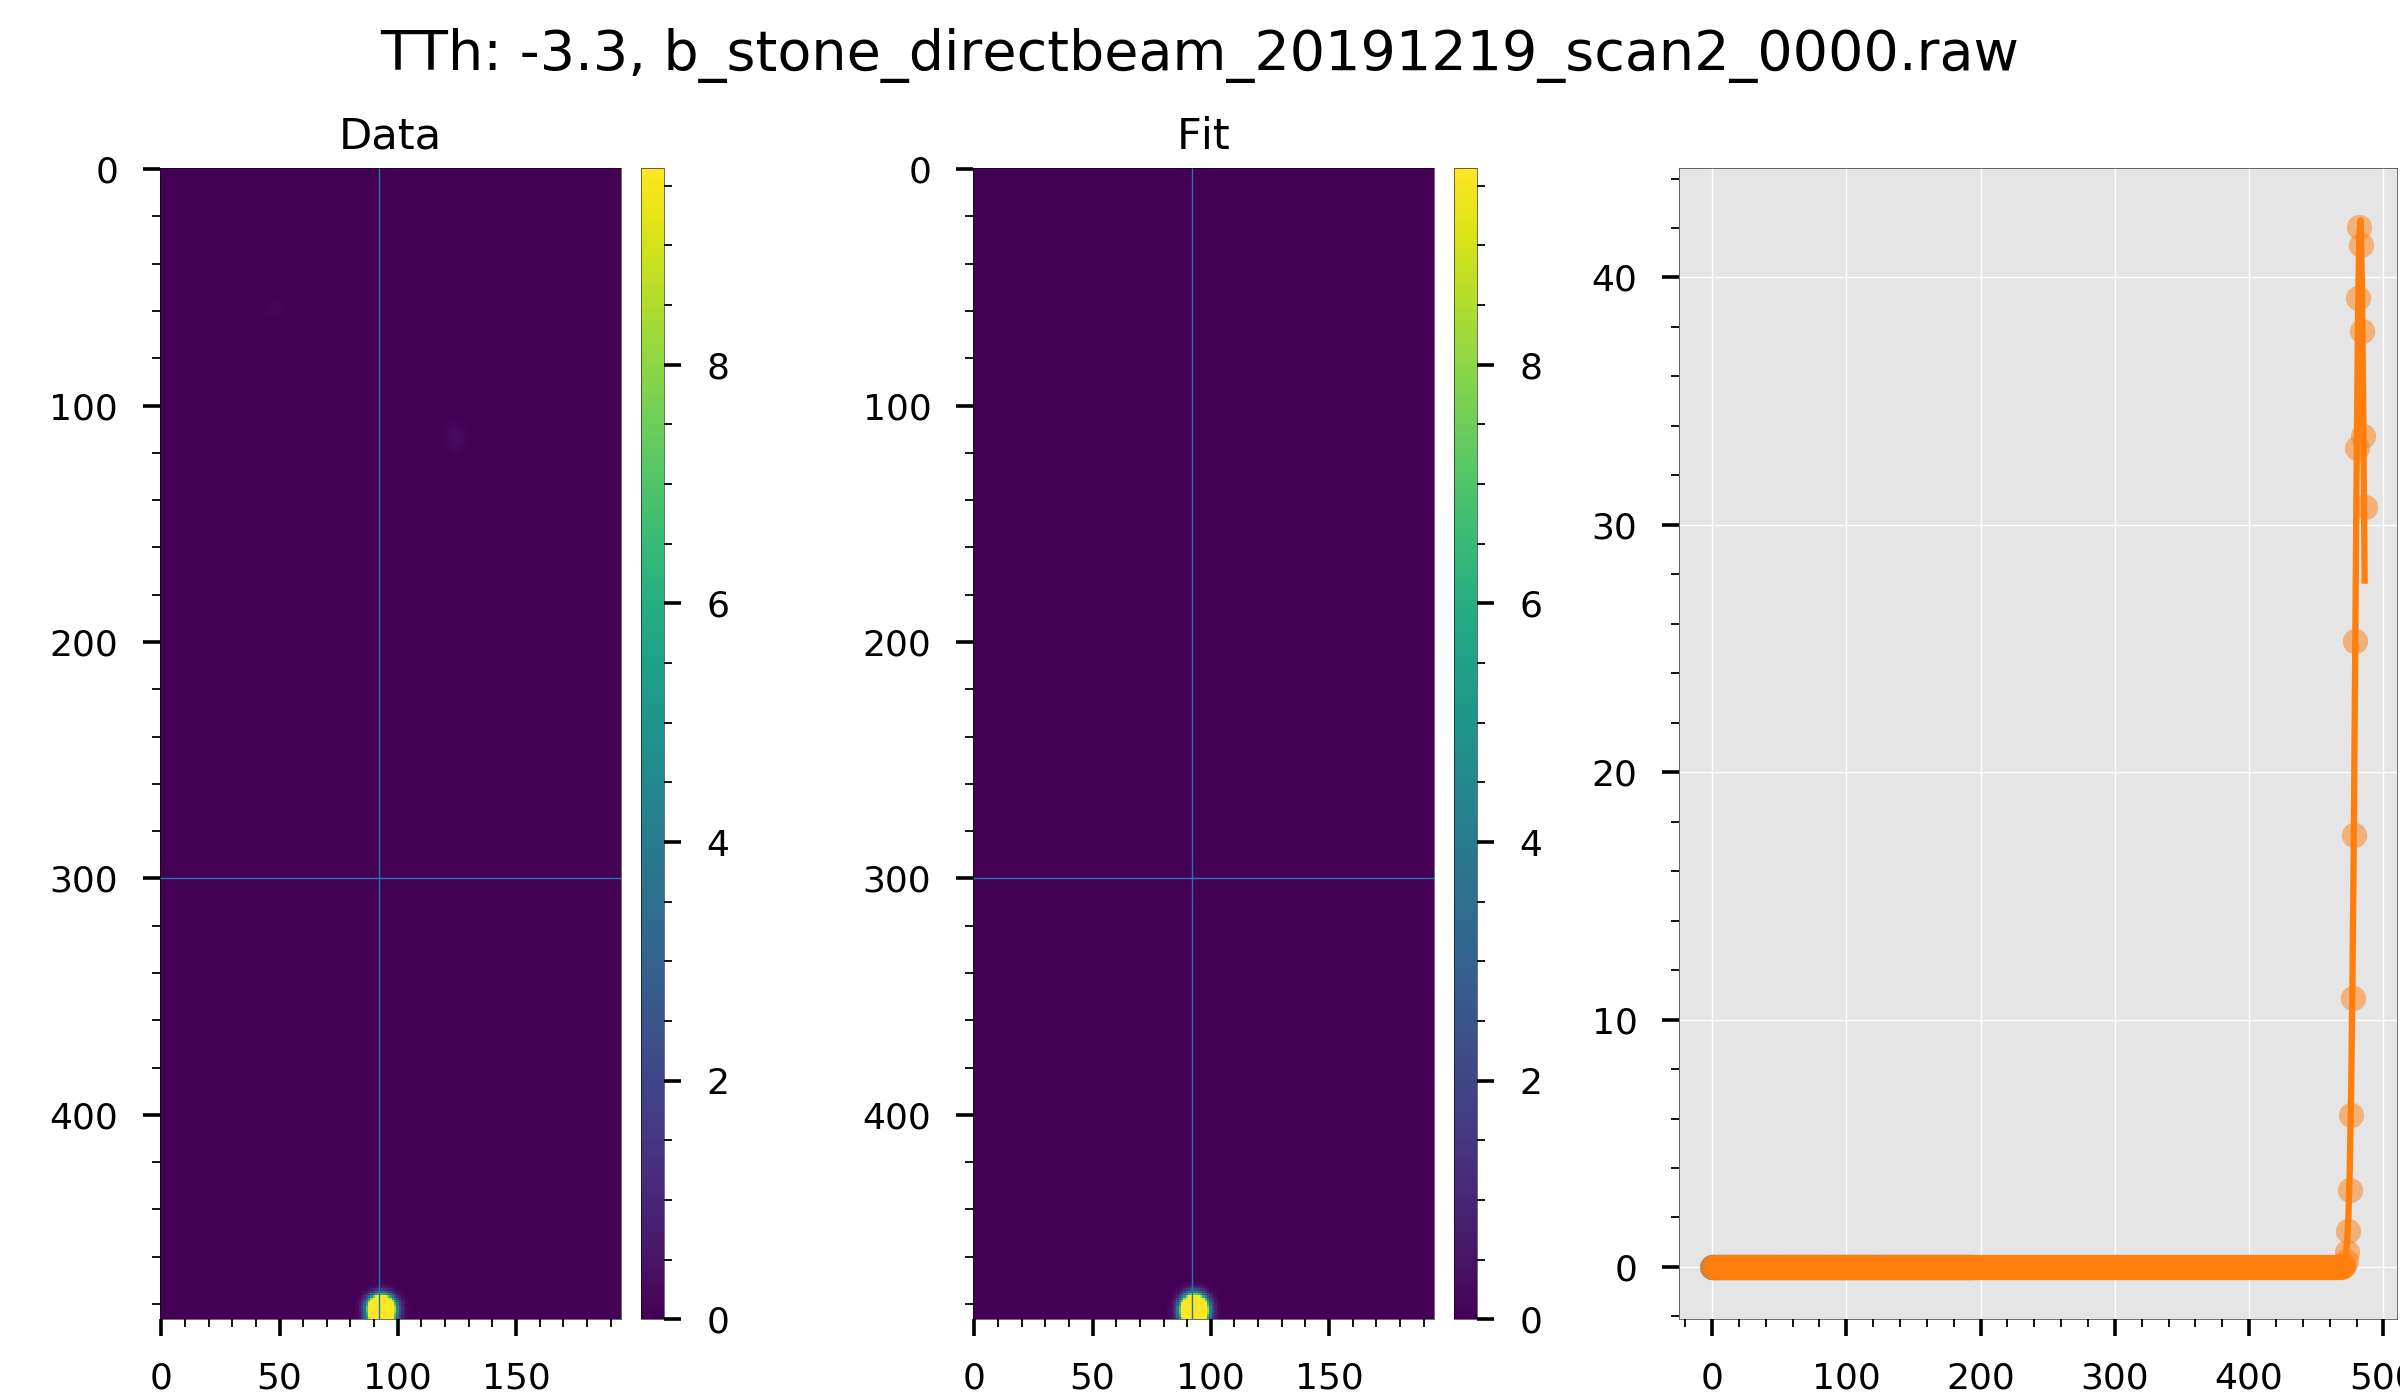

interactive(children=(Dropdown(description='fname', options=('b_stone_directbeam_20191219_scan2_0000.raw', 'b_…

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,7))
fig.subplots_adjust(top=0.8)

divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.1)

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.1)

@interact(fname=img_fnames,
          row=IntSlider(min=0, max=486, step=1, value=300),
          col=IntSlider(min=0, max=192, step=1, value=92),
          window_size=IntSlider(min=1, max=100, step=2, value=3),
          order=IntSlider(min=0, max=10, step=1, value=0),
          function=['gaussian', 'lorentzian', 'pvoigt'],
         )
def show_image(fname, row, col, window_size, order, function):
    global im, fit

    img = read_image_file( os.path.join(img_path, fname), orientation='vertical',
                          flip=False, return_float=True )
    tth = TThs[fname]
    
    img = smooth_img(img, kernel_size=3, window_size=window_size, order=order)
    
    fit, pars, img_fit = get_fit(img, function=function)
        
    [ax.cla() for ax in fig.get_axes()]
    
    vminmax = np.percentile(img, (1,99.9))
    i1 = ax1.imshow(img, vmin=vminmax[0], vmax=vminmax[1])
    plt.colorbar(i1, cax=cax1)
    ax1.axhline(row, lw=0.5)
    ax1.axvline(col, lw=0.5)
    ax1.grid(False)
    ax1.set_title('Data')
    
    i2 = ax2.imshow(img_fit, vmin=vminmax[0], vmax=vminmax[1])
    plt.colorbar(i2, cax=cax2)
    ax2.axhline(row, lw=0.5)
    ax2.axvline(col, lw=0.5)
    ax2.grid(False)
    ax2.set_title('Fit')

    p1, = ax3.plot(img[row], 'o', alpha=0.5)#, ms=5)
    ax3.plot(img_fit[row], '-', color=p1.get_color())
    
    p2, = ax3.plot(img[:,col], 'o', alpha=0.5)#, ms=3)
    ax3.plot(img_fit[:,col], '-', color=p2.get_color())
    
    [t.remove() for t in fig.texts]
    fig.text(0.5, 0.95, f'TTh: {tth}, {os.path.basename(fname)}', ha='center', fontsize=20)
    fig.tight_layout(pad=0.1)
    fig.subplots_adjust(top=0.88)

## Fit all images

In [6]:
Fit_Results, FNames, Img_Fits, Init_Params = dict(), dict(), dict(), dict()

n_cores = mp.cpu_count()
fit_results = Parallel(n_jobs=n_cores) (
    delayed(fit_images_2D)(os.path.join(img_path, fname), tth, function='pvoigt',
                           kernel_size=3, window_size=1,
                           verbose='True', orientation='vertical', flip=False)
    for (fname, tth) in zip(img_fnames[::], tths[::]) )


Fit_Results = OrderedDict ( { tth:fit_result for (tth, fit_result) in fit_results } )
#Fit_Results = OrderedDict ( { k:Fit_Results[k] for k in sorted(Fit_Results.keys()) } )

tths = np.asarray( list(Fit_Results.keys()) )
xs = np.asarray( [Fit_Results[tth].params['center_x'] for tth in tths] )
ys = np.asarray( [Fit_Results[tth].params['center_y'] for tth in tths] )

<IPython.core.display.Javascript object>


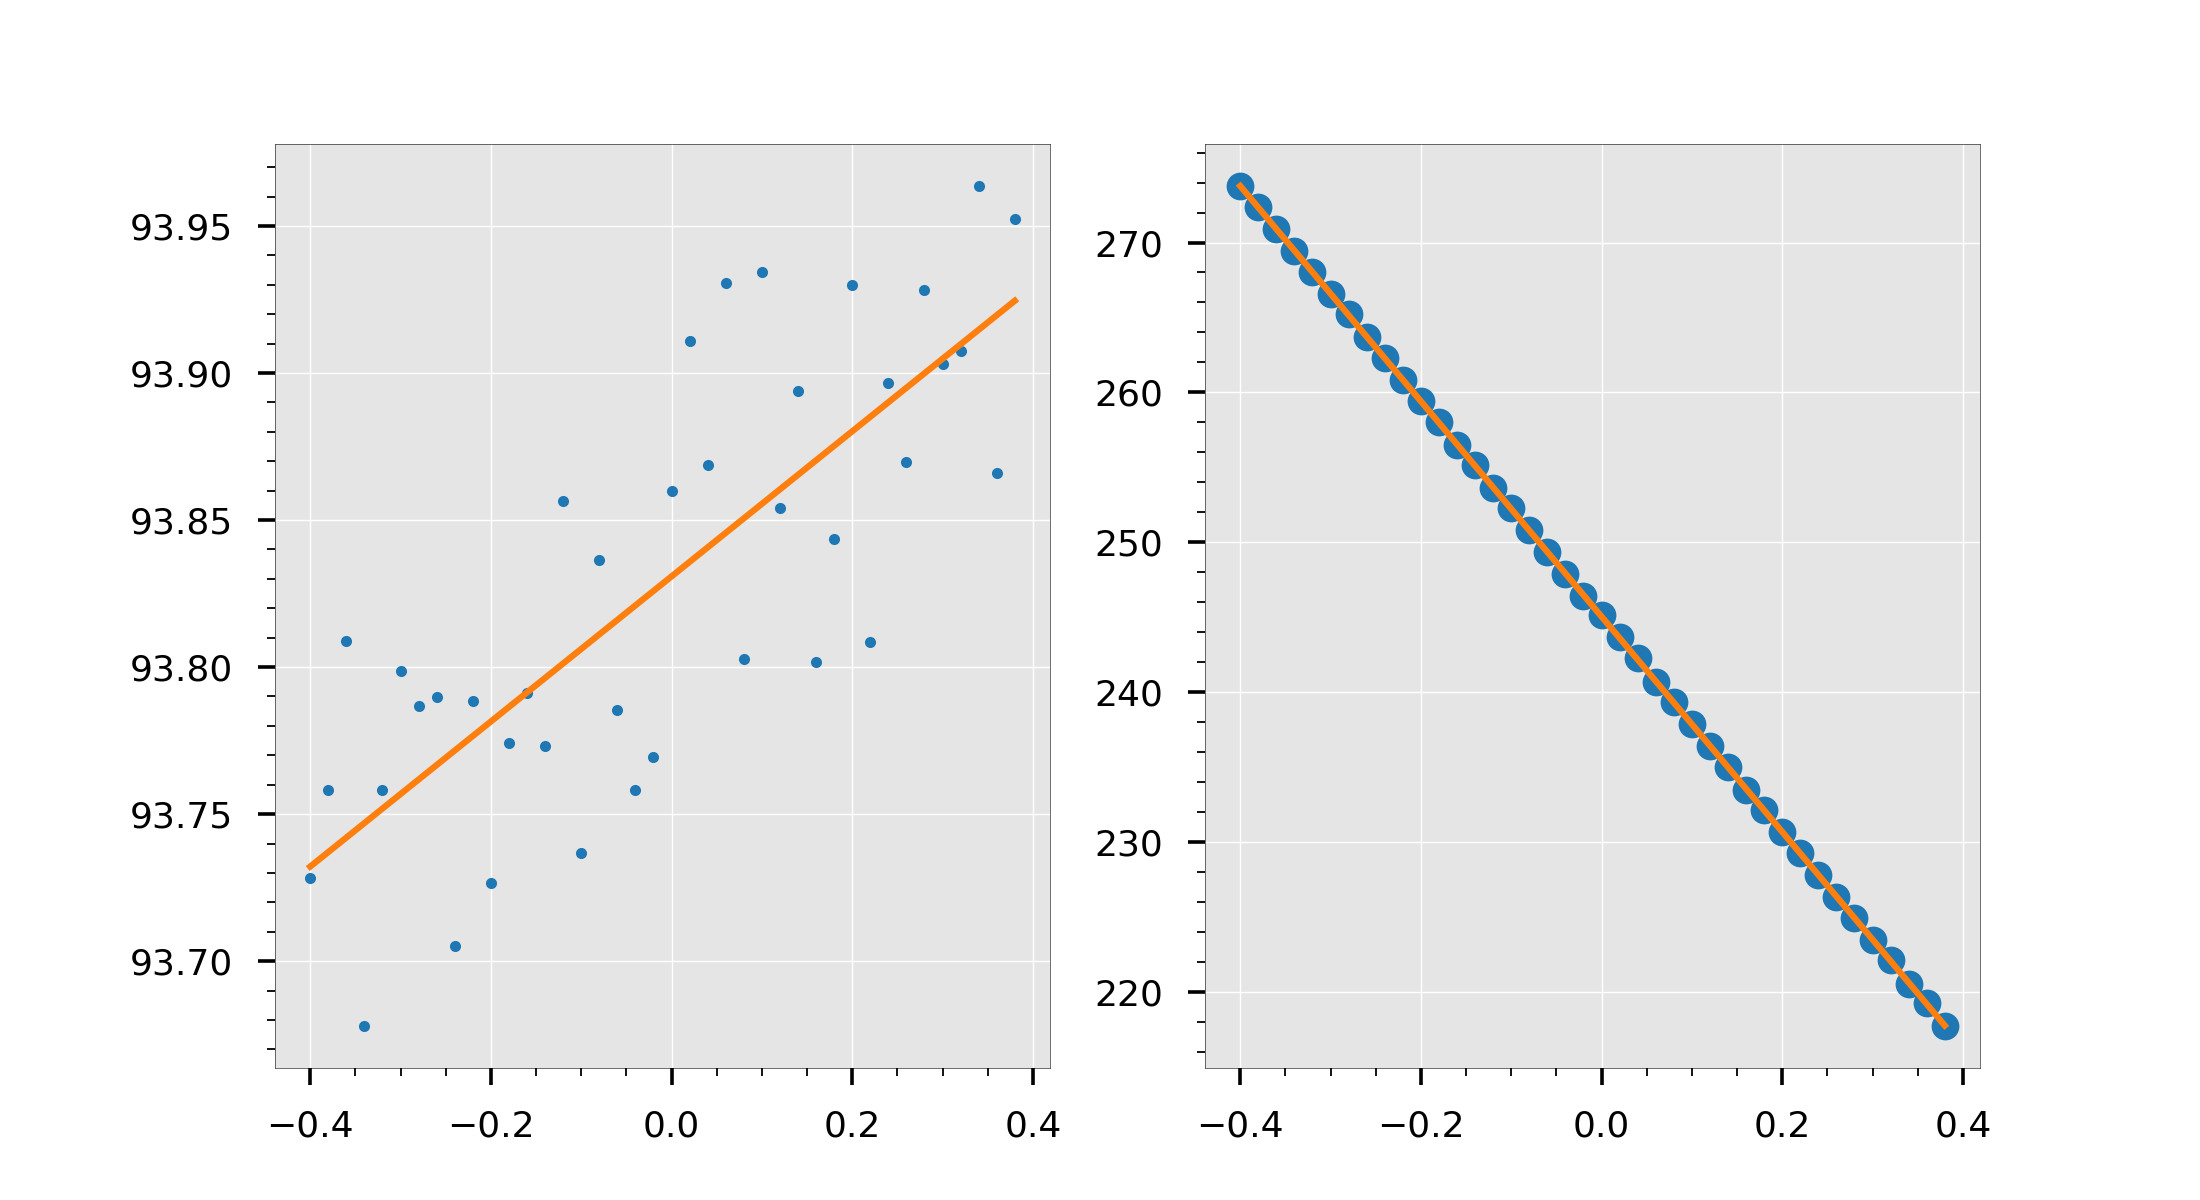

Direct beam pixel at TTh=0: [93.83, 245.05]


In [11]:
# Get direct beam pixel at TTh = 0 degrees

def get_db_pixel(tths, xs, ys):
    n0 = len(tths)//2
    s_ = np.s_[n0-20:n0+20]

    xs, ys, tths = xs[s_], ys[s_], tths[s_]

    mod_xs = LinearModel()
    params_xs = mod_xs.guess(xs, x=tths)
    fit_xs = mod_xs.fit(xs, params=params_xs, x=tths)
    fit_xs = mod_xs.fit(xs, params=fit_xs.params, x=tths)
    xs_fit_val = fit_xs.eval(params=fit_xs.params, xdata=tths)

    mod_ys = LinearModel()
    params_ys = mod_ys.guess(ys, x=tths)
    fit_ys = mod_ys.fit(ys, params=params_ys, x=tths)
    fit_ys = mod_ys.fit(ys, params=fit_ys.params, x=tths)
    ys_fit_val = fit_ys.eval(params=fit_ys.params, xdata=tths)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11,6))

    ax1.plot(tths, xs, 'o', ms=4)
    ax1.plot(tths, xs_fit_val)

    ax2.plot(tths, ys, 'o', ms=10)
    ax2.plot(tths, ys_fit_val)
    
    x0 = fit_xs.eval(params=fit_xs.params, x=0.0)
    y0 = fit_ys.eval(params=fit_ys.params, x=0.0)

    return x0, y0

x0, y0 = get_db_pixel(tths, xs, ys)
print(f'Direct beam pixel at TTh=0: [{x0:.2f}, {y0:.2f}]')

## Obtain poni file parameters from fits

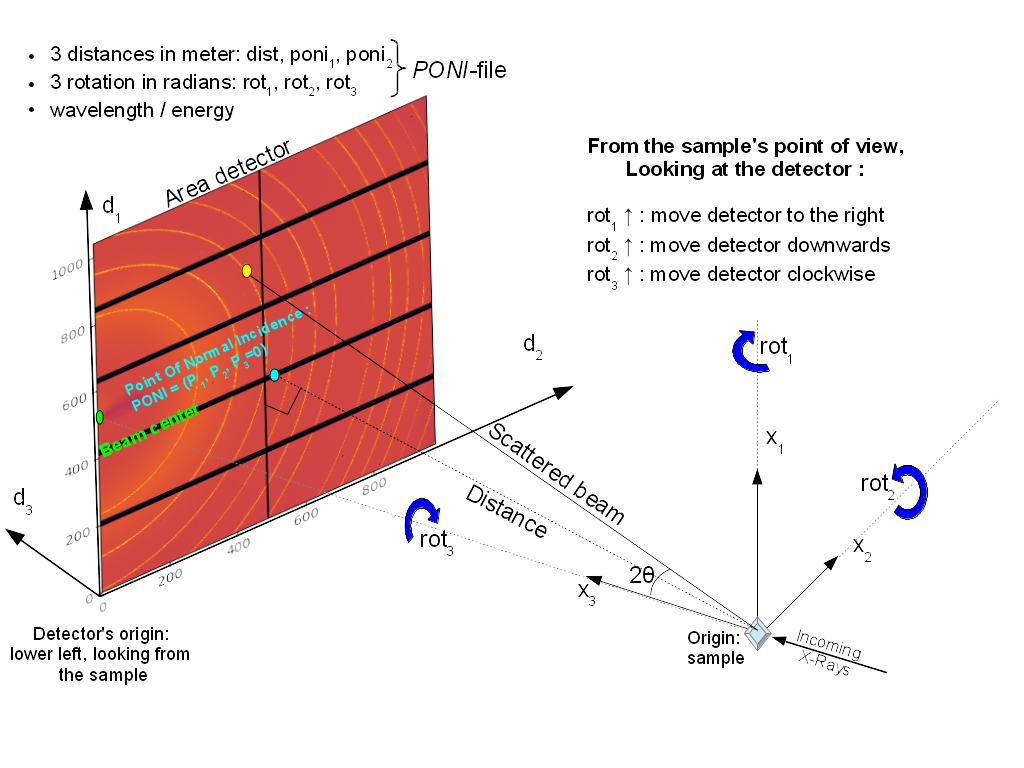

In [11]:
poni_img = '/Users/v/Research/RDA/Calibration/geometry/PONI.png'
Image(filename=poni_img, width=1000)

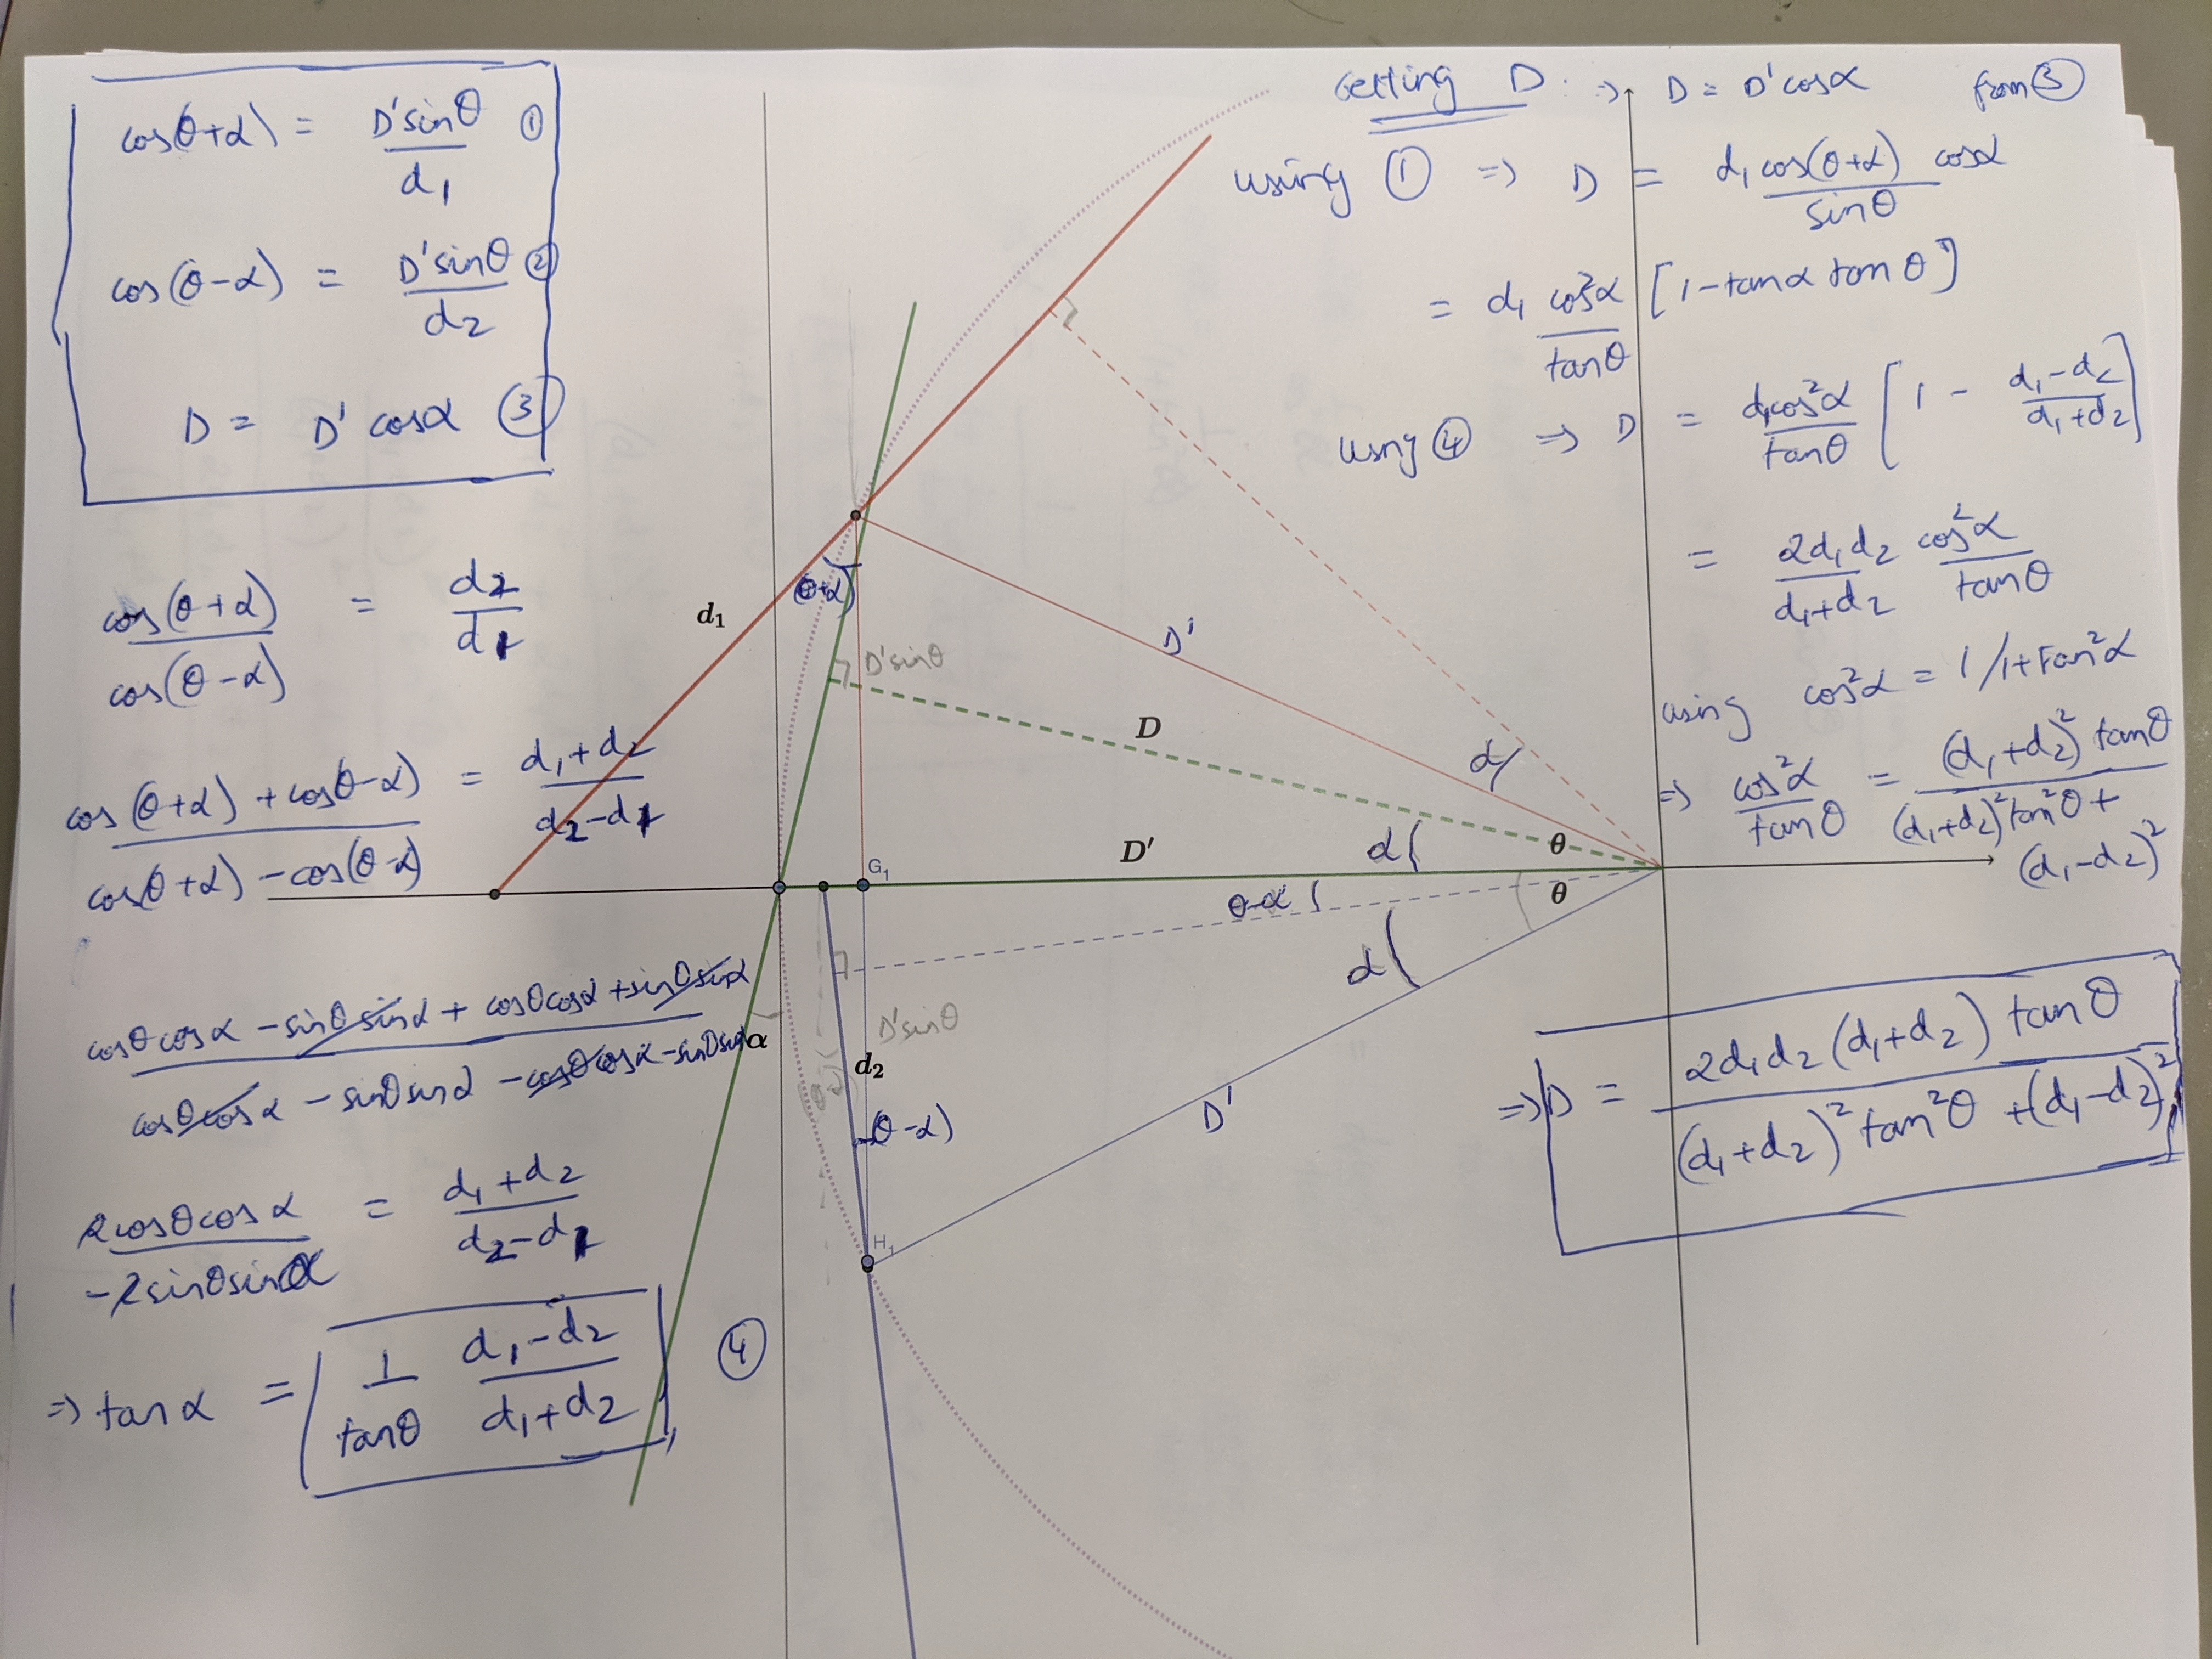

In [12]:
geometry_img = '/Users/v/Research/RDA/Calibration/geometry/Geometry.jpg'
Image(filename=geometry_img, width=1000)

<font size="4"><b><center> Equations used to find Sample Detector Distance ($D$), poni, rot2 ($\alpha$) and rot3 ($\phi$)</center></b></font>

$$ tan(\alpha) = \frac{1}{tan(\theta)} \frac{d_1 - d_2}{d_1 + d_2} $$

$$ D = \frac{2 d_1 d_2 (d_1 + d_2) tan(\theta)}{(d_1 + d_2)^2 tan^2(\theta) + (d_1 - d_2)^2} $$

$$ d_1 = \sqrt( (y_1 - y_0)^2 + (x_1 - x_0)^2 ) $$
$$ d_2 = \sqrt( (y_2 - y_0)^2 + (x_2 - x_0)^2 ) $$

$$ tan(\phi) = \frac{x_1 - x_2}{y_1 - y_2} $$
    
$$ Poni: (x_p, y_p) = (x_0 - D.tan(\alpha).sin(\phi), y_0 + D.tan(\alpha).cos(\phi)) $$    
($x_0$, $y_0$) is the direct beam pixel at $tth=0$ degrees.

($x_1$, $y_1$) and ($x_2$, $y_2$) are the direct beam pixels at $tth = \pm \theta$ degrees.

$d_1$ and $d_2$ are the distances the direct beam moves along the detector when the TwoTheta arm is moved $\pm \theta$ degrees from $0$



<IPython.core.display.Javascript object>


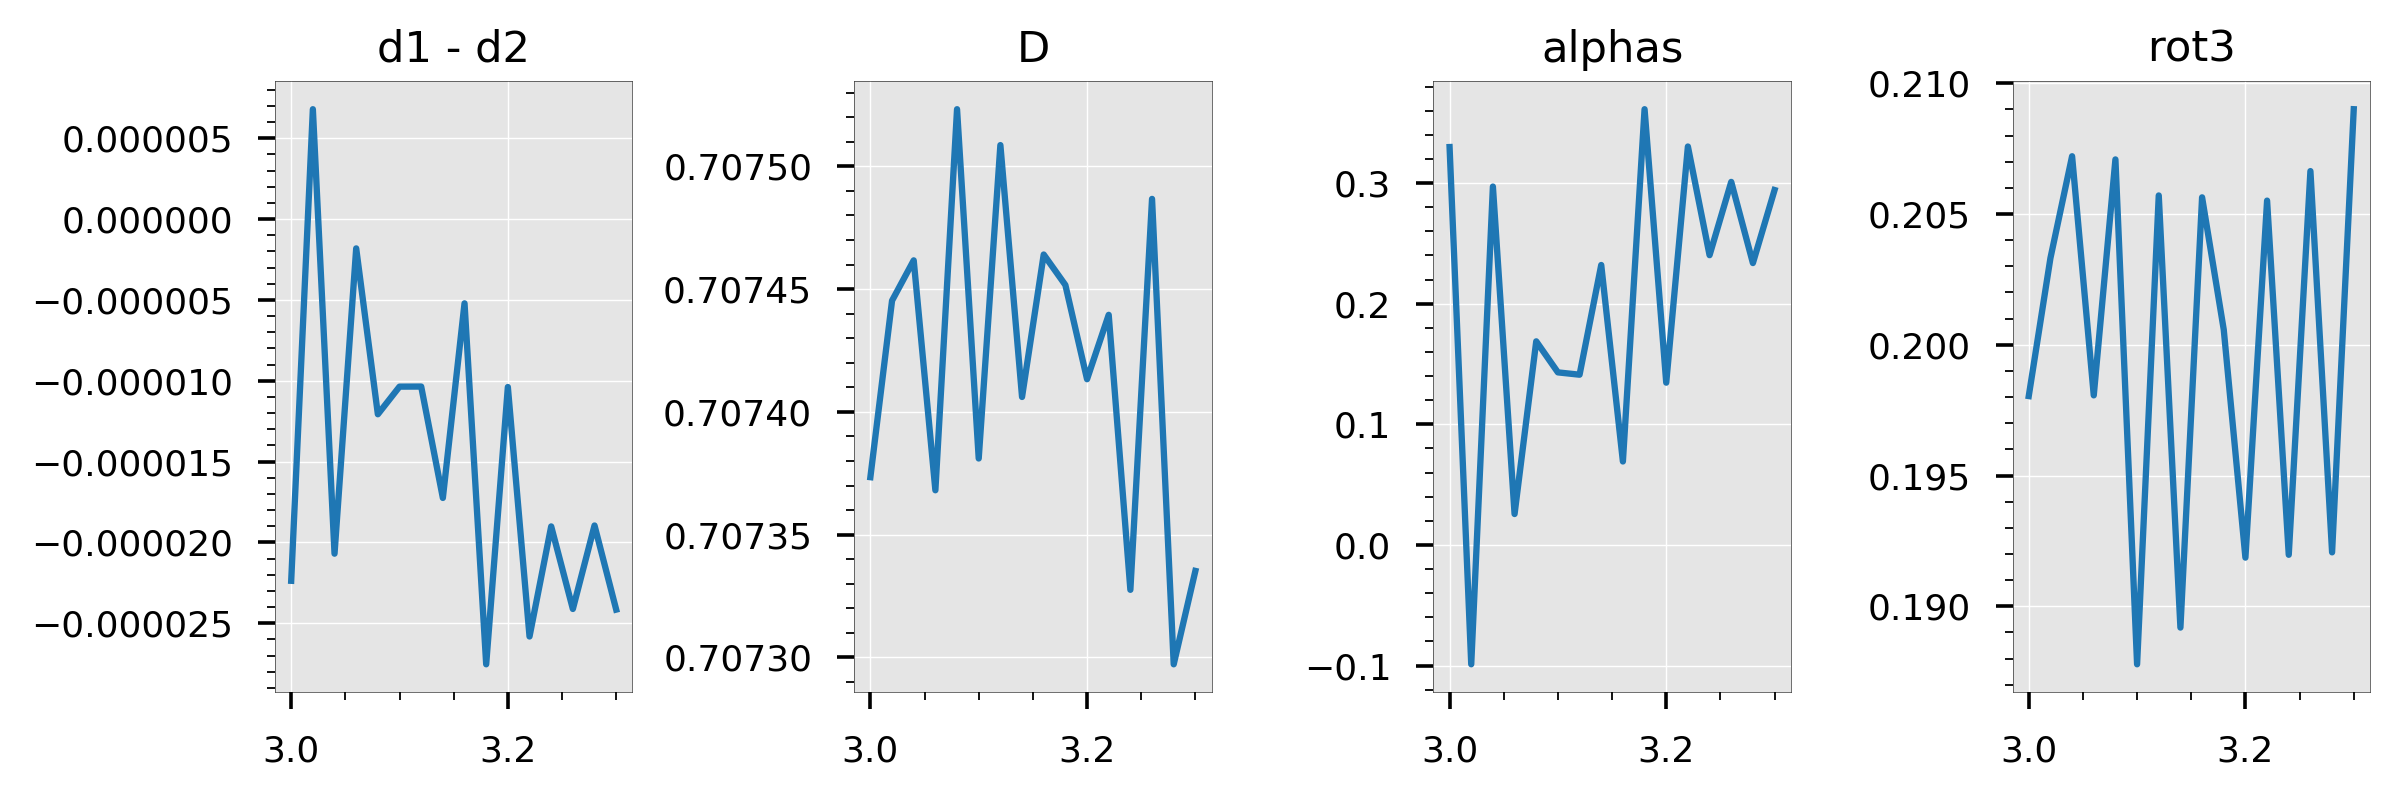

0.7074206126050728 0.003343720537347611 0.0034925470261441046 0.03978234535441147 0.016147163403927592


In [12]:
def get_poni_params(tths, xs, ys, x0, y0, pixel_sz=0.000172):
    xs = np.round(xs, 2)
    ys = np.round(ys, 2)
    
    n0 = len(tths)//2; tth0 = tths[n0]

    xys = []
    ds, Ds, alphas, rot3s, all_tths = [], [], [], [], []
    for ii in range(0, n0):
        idx1, idx2 = ii, -ii-1
        tth1, tth2 = tths[idx1], tths[idx2]
        
        if abs(tth1) < 3:
            continue
        #print(idx1, idx2, tth0, tth1, tth2, n0, len(tths))

        if tth1 != -tth2:
            print(f'tth1 ({tth1}) != -tth2 ({tth2})')
            break
            
        x1, x2 = xs[idx1], xs[idx2]
        y1, y2 = ys[idx1], ys[idx2]

        xys.append(np.asarray([x1, y1, x2, y2]))

        d1 = np.sqrt( (x1 - x0)**2 + (y1 - y0)**2 ) * pixel_sz
        d2 = np.sqrt( (x2 - x0)**2 + (y2 - y0)**2 ) * pixel_sz

        #d1 = np.sqrt( (y1 - y0)**2 )# * pixel_sz
        #d2 = np.sqrt( (y2 - y0)**2 )# * pixel_sz

        ds.append(np.asarray([d1, d2]))

        tth = np.deg2rad (abs(tth1))

        D = 2 * d1 * d2 * (d1 + d2) * np.tan(tth) / (
            (d1 + d2)**2 * np.tan(tth)**2  + (d1 - d2)**2 )

        alpha = - np.arctan( 1/np.tan(tth) * (d1 - d2) / (d1 + d2) )
        rot3 = - (x1 - x2) / (y1 - y2)

        Ds.append(D)
        alphas.append(alpha)
        rot3s.append(rot3)
        all_tths.append( np.rad2deg(tth) )

    ds = np.asarray(ds); xys = np.asarray(xys)
    d1, d2 = ds[:,0], ds[:,1] 

    fig, axs = plt.subplots(ncols=4, figsize=(12,4))
    axs[0].plot(all_tths, d1-d2)
    axs[0].set_title('d1 - d2')

    axs[1].plot(all_tths, Ds[:])
    axs[1].set_title('D')

    axs[2].plot(all_tths, np.rad2deg(alphas[:]))
    axs[2].set_title('alphas')

    axs[3].plot(all_tths, np.rad2deg(rot3s[:]))
    axs[3].set_title('rot3')
    fig.tight_layout()

    D = np.mean(Ds[:-1])
    rot2 = np.mean(alphas[:-1])
    rot3 = np.mean(rot3s[:-1])

    poni1 = y0 * pixel_sz - D*np.tan(rot2)*np.cos(rot3)
    poni2 = x0 * pixel_sz + D*np.tan(rot2)*np.sin(rot3)
    #poni1 = (485-y0) * pixel_sz + D*np.tan(rot2)*np.cos(rot3)# + 0.005

    print(D, rot2, rot3, poni1, poni2)
    return D, rot2, rot3, poni1, poni2
 
D, rot2, rot3, poni1, poni2 = get_poni_params(tths, xs, ys, x0, y0, pixel_sz=0.000172)
#xys = get_poni_params(tths, xs, ys, x0, y0, pixel_sz=0.000172)

## Create PONI file from above

In [13]:
energy = spec_file.motor_position_by_name(0, 'Monochrom')
wavelength = 12398/energy * 1e-10
print(f'Energy: {energy}, Wavelength: {wavelength}')

poni_params = dict(
    detector = "Pilatus100k", #detector,
    dist = D,
    poni1 = poni1,
    poni2 = poni2,
    rot1 = 0.,
    rot2  = rot2,
    rot3  = rot3,
    wavelength = wavelength
)

ai = pyFAI.azimuthalIntegrator.AzimuthalIntegrator(**poni_params)
ai.save(os.path.join(path, 'test.poni'))
print(ai)

Energy: 17000.009, Wavelength: 7.292937315503775e-11
Detector Pilatus 100k	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 7.292937e-11m
SampleDetDist= 7.074206e-01m	PONI= 3.978235e-02, 1.614716e-02m	rot1=0.000000  rot2= 0.003344  rot3= 0.003493 rad
DirectBeamDist= 707.425mm	Center: x=93.879, y=245.045 pix	Tilt=0.192 deg  tiltPlanRotation= 90.000 deg


In [15]:
from itertools import product

params = ai.param

n_iter = 5

dparams = [0.01, 0.0005, 0.0005, 0.0005, 0.0005, 0.0005]
param_range = [np.linspace(p-dp, p+dp, n_iter) for (p, dp) in zip(params, dparams)]

poni_params_list = [['Pilatus100k'] + list(p) + [wavelength] for p in product(*param_range)]

pnames = ['detector', 'dist', 'poni1', 'poni2', 'rot1', 'rot2', 'rot3', 'wavelength']
poni_params_list_dict = [{pname:pval for (pname, pval) in zip(pnames, pvals)} for pvals in poni_params_list]

ais_list = [pyFAI.azimuthalIntegrator.AzimuthalIntegrator(**poni_params) for poni_params in poni_params_list_dict]
print(len(ais_list))

15625


In [16]:
spec_file = SpecFile( os.path.join(spec_path, 'directbeam_20191219') )#''direct_beam_full') ) #LaB6_2

img_fnames = sorted(fnmatch.filter(os.listdir(img_path), '*directbeam_20191219_scan2*.raw'))[:3] # '*direct_beam_full_scan1*.raw'))
pdi_fnames = {img_fname: f'{img_fname}.pdi' for img_fname in img_fnames
             if os.path.exists( os.path.join(pdi_path, f'{img_fname}.pdi') )}

if len(pdi_fnames) != len(img_fnames):
    print('PDI files for all images not present..')
    
TThs = {fname: get_motor_val( os.path.join(pdi_path, pdi_fname), 'TwoTheta' )
        for fname, pdi_fname in pdi_fnames.items()}

In [17]:
def test_integrate(ai, integrate_2D=False, verbose=False):
    t0 = time.time()

    if verbose:
        print(ai)
    ais, imgs = [], []

    for img_fname, tth in TThs.items():
        img = read_image_file( os.path.join(img_path, img_fname), return_float=True, orientation='vertical', flip=False )
        ai_tth = deepcopy(ai)
        ai_tth.rot2 -= np.deg2rad(tth)

        imgs.append(img), ais.append(ai_tth)

    mg = MultiGeometry(ais, unit="2th_deg", radial_range=(-0.1, 0.1))

    x, ii = mg.integrate1d(imgs, 200)
    int_1D.append((x, ii))
    
    if integrate_2D:
        i_qChi, q, chi = mg.integrate2d(imgs, 200, 200)
        int_2D.append((i_qChi, q, chi))

    if verbose:
        t1 = time.time()
        print(t1-t0)
        
    return (ai, x, ii)    
        
        
int_1D = []
int_2D = []

#for idx, ai_ in enumerate(ais_list):
#    print(idx, end='\r')
#    test_integrate(ai_)

In [18]:
n_cores = mp.cpu_count()
results = Parallel(n_jobs=n_cores) (#, require='sharedmem') (
    delayed(test_integrate)(ai, integrate_2D=False, verbose=False)
        for ai in ais_list )

In [19]:
len(results)

15625

In [20]:
ai_, x, ii = results[0]

In [25]:
all_ii = np.zeros((len(results), len(results[0][1])))

In [32]:
all_ii = np.asarray([result[2] for result in results])
all_int_ii = np.sum(all_ii[:,:20], axis=1)

In [35]:
ai_max = results[np.argmax(all_int_ii)]

In [37]:
ai

Detector Pilatus 100k	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 7.292937e-11m
SampleDetDist= 7.074206e-01m	PONI= 3.978235e-02, 1.614716e-02m	rot1=0.000000  rot2= 0.003344  rot3= 0.003493 rad
DirectBeamDist= 707.425mm	Center: x=93.879, y=245.045 pix	Tilt=0.192 deg  tiltPlanRotation= 90.000 deg

<IPython.core.display.Javascript object>


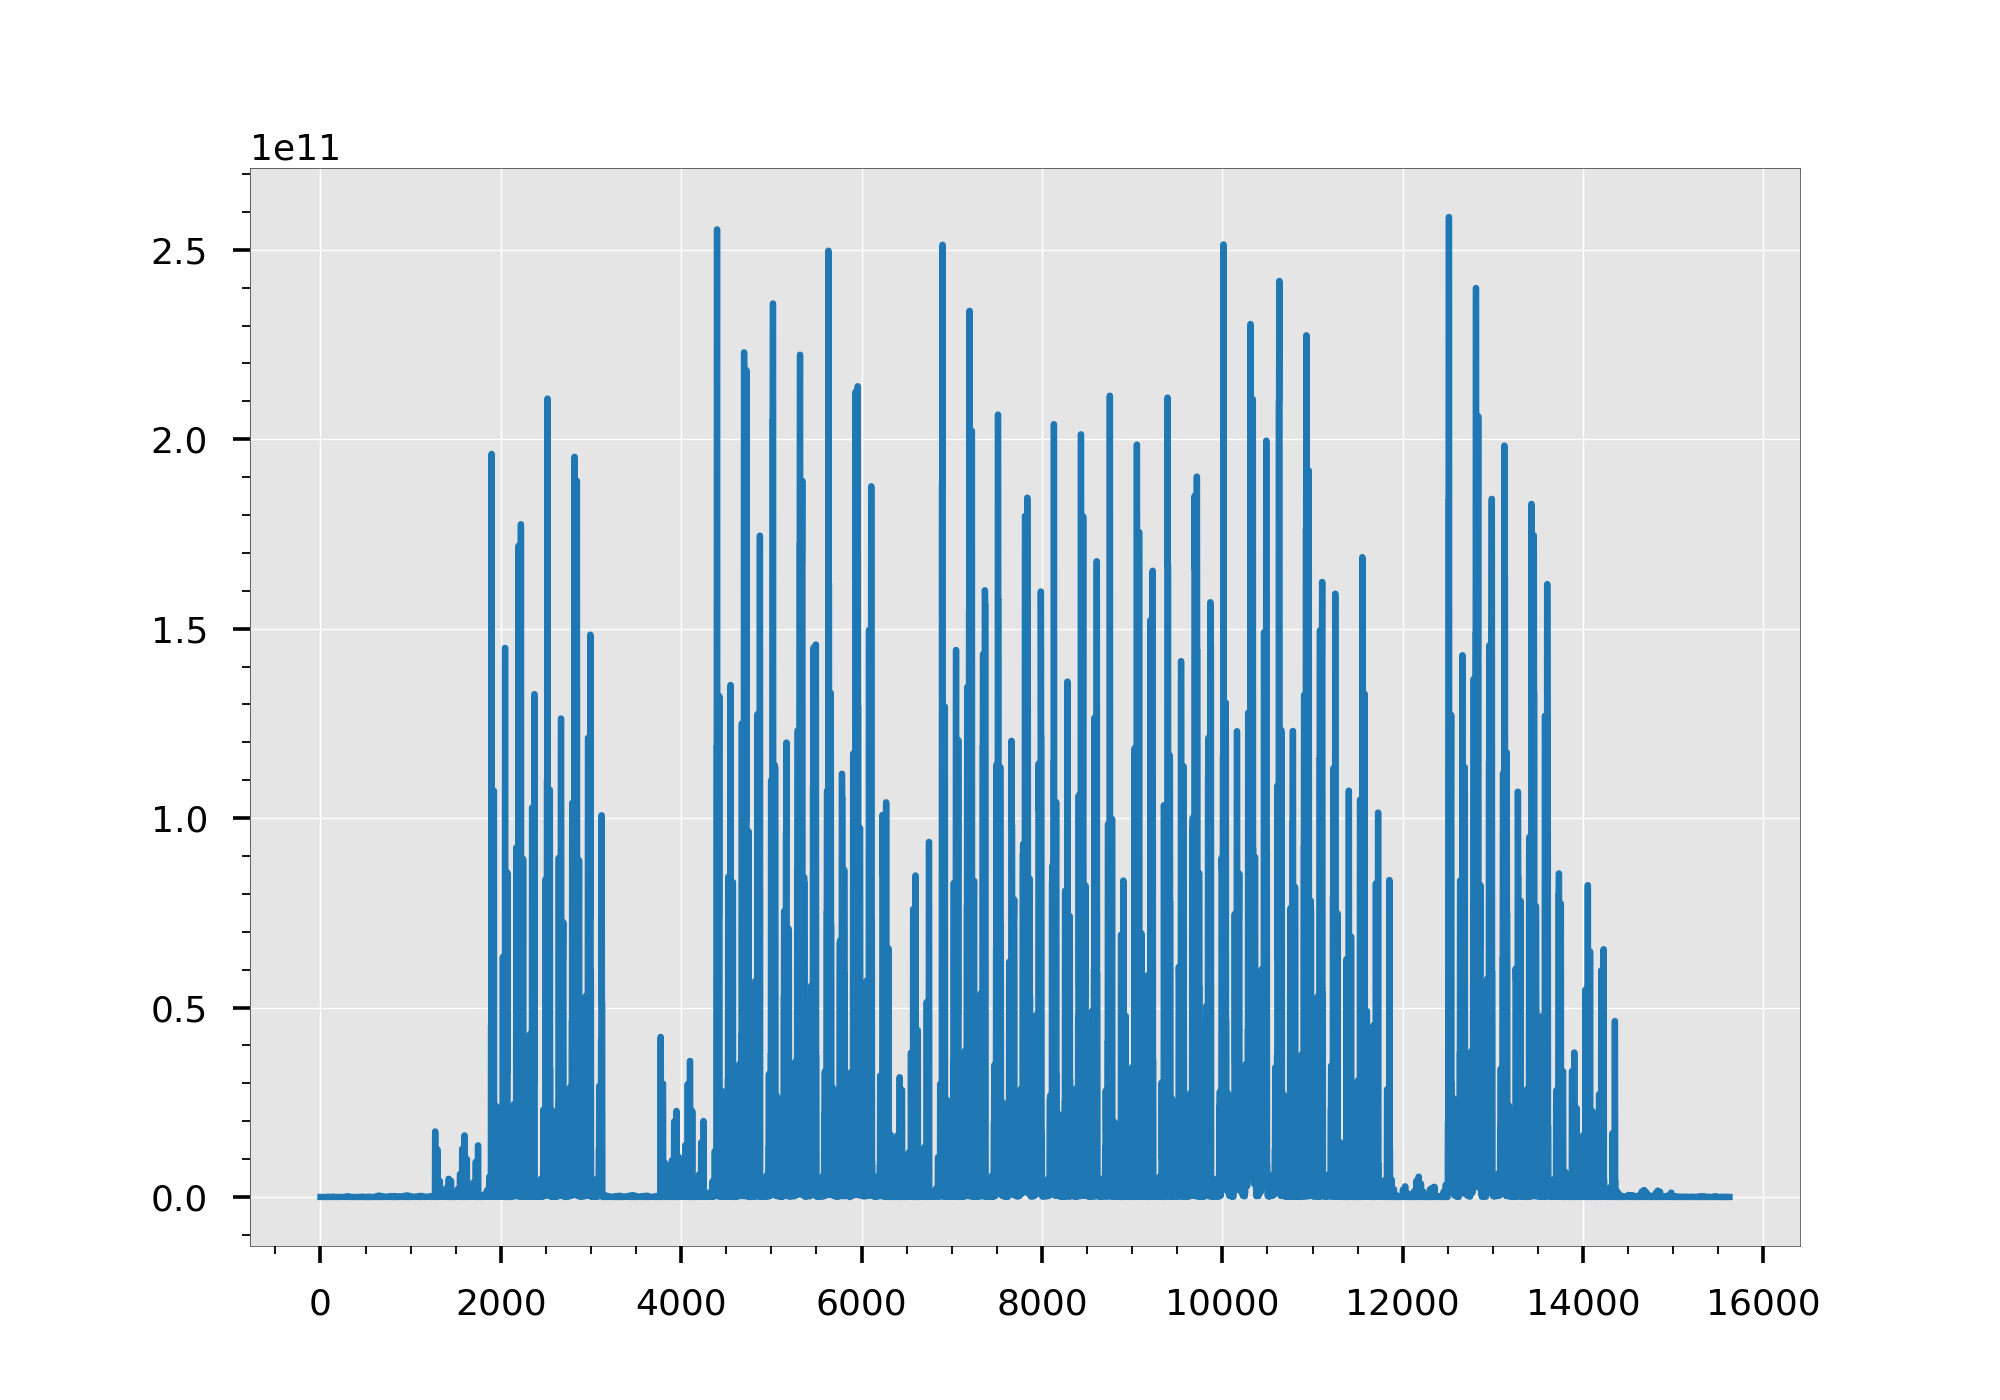

In [34]:
plt.figure()
plt.plot(all_int_ii)


<IPython.core.display.Javascript object>


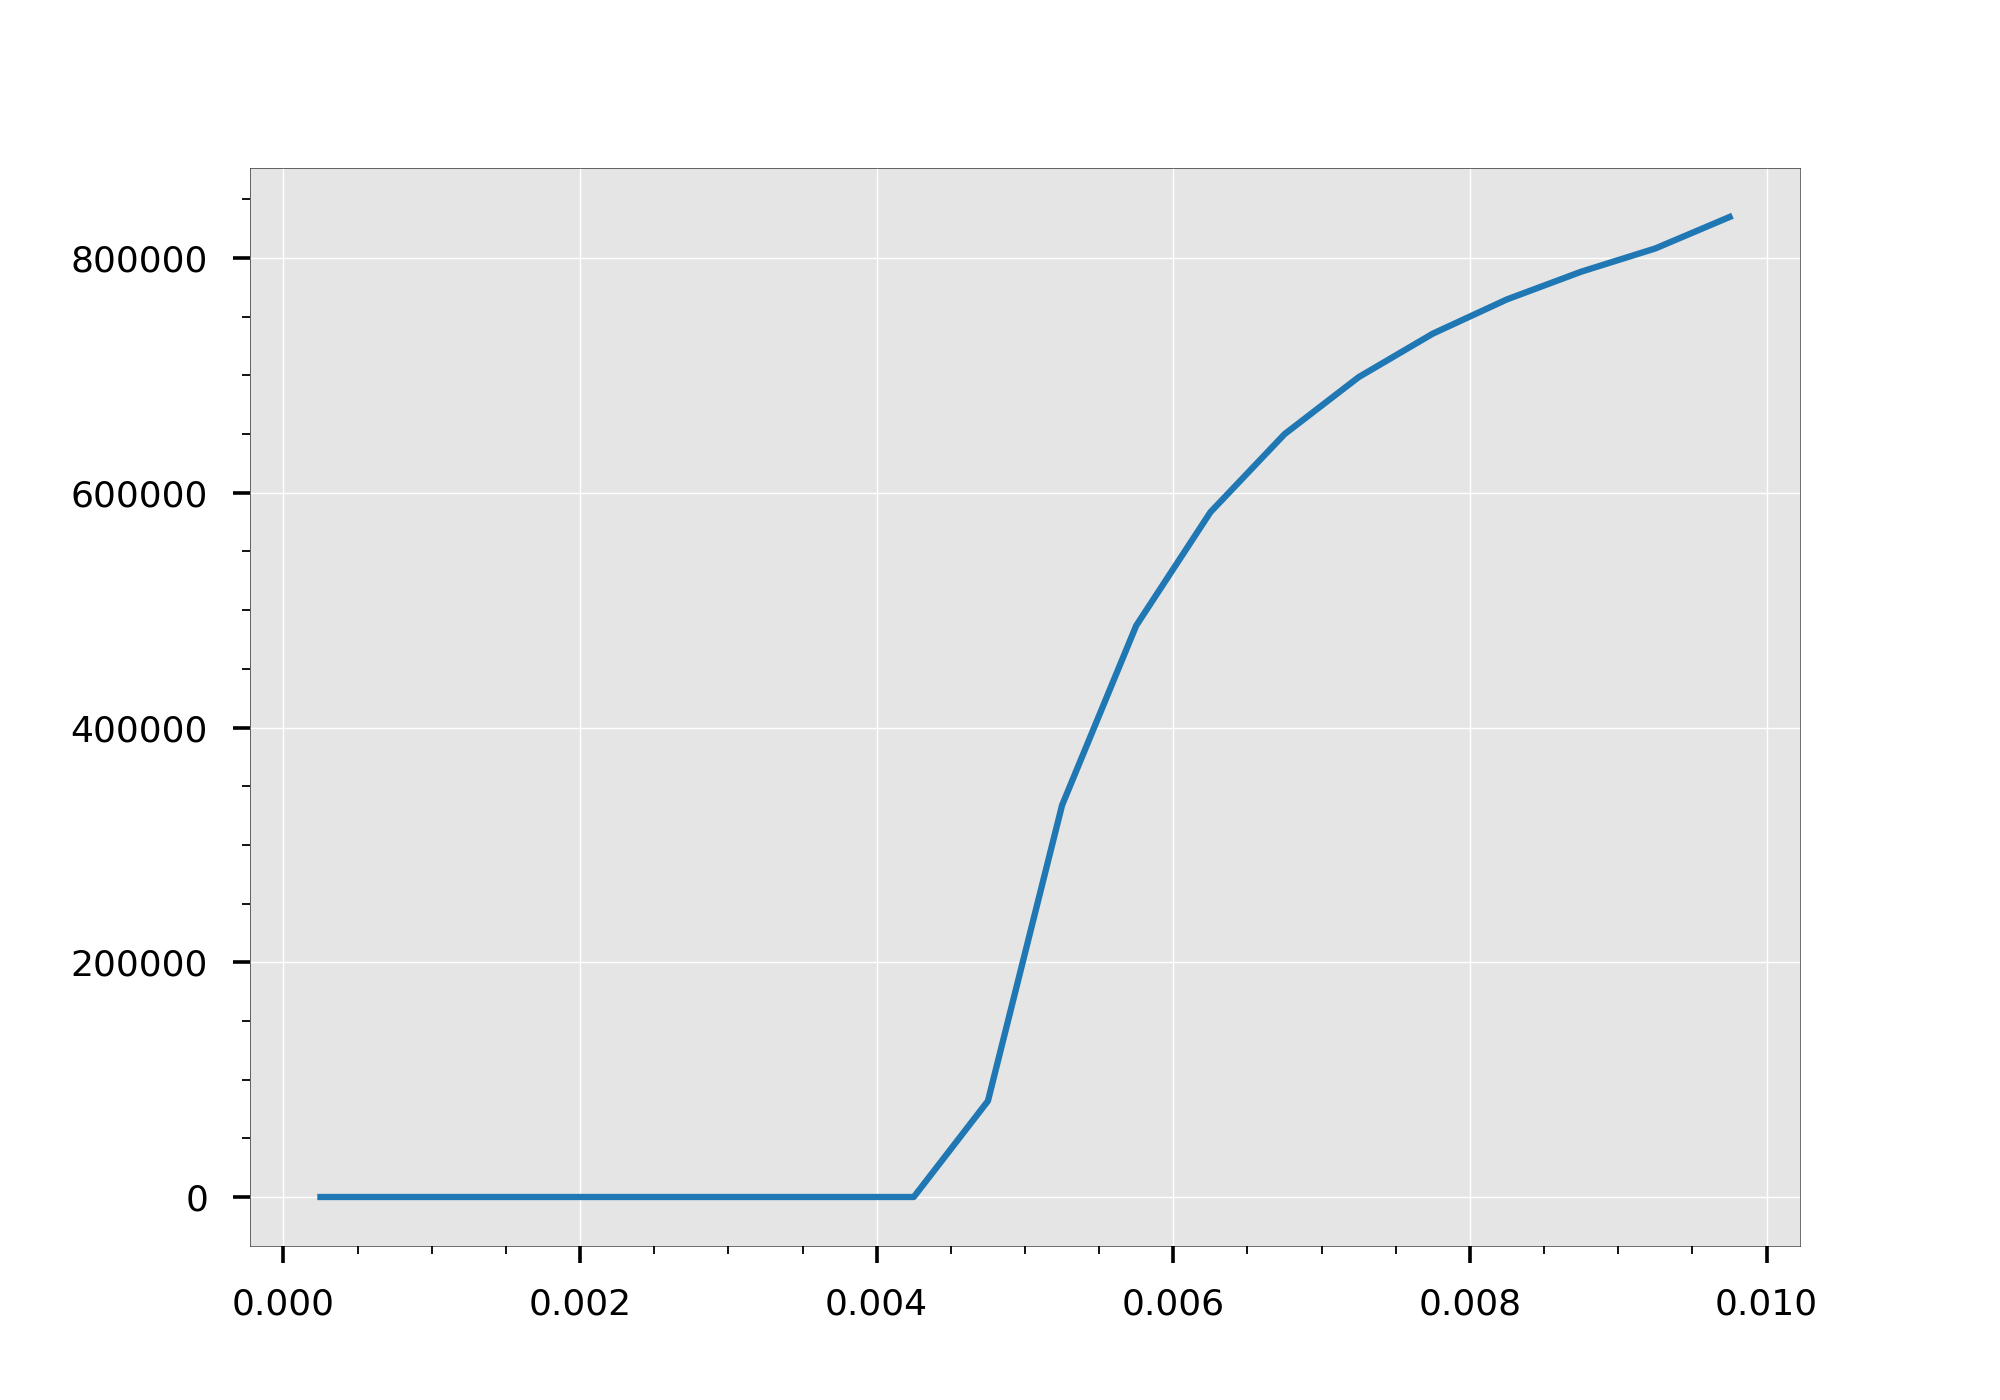

In [24]:
plt.figure()
plt.plot(x[:20], ii[:20])

In [ ]:
n_cores = mp.cpu_count()
_ = Parallel(n_jobs=n_cores, require='sharedmem') (
    delayed(test_integrate)(ai, integrate_2D=False, verbose=False)
        for ai in ais_list )

## Integrate using above Poni File

Energy: 17000.009, Wavelength: 7.292937315503775e-11
Detector Pilatus 100k	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 7.292937e-11m
SampleDetDist= 7.074206e-01m	PONI= 3.978235e-02, 1.614716e-02m	rot1=0.000000  rot2= 0.003344  rot3= 0.003493 rad
DirectBeamDist= 707.425mm	Center: x=93.879, y=245.045 pix	Tilt=0.192 deg  tiltPlanRotation= 90.000 deg


<IPython.core.display.Javascript object>


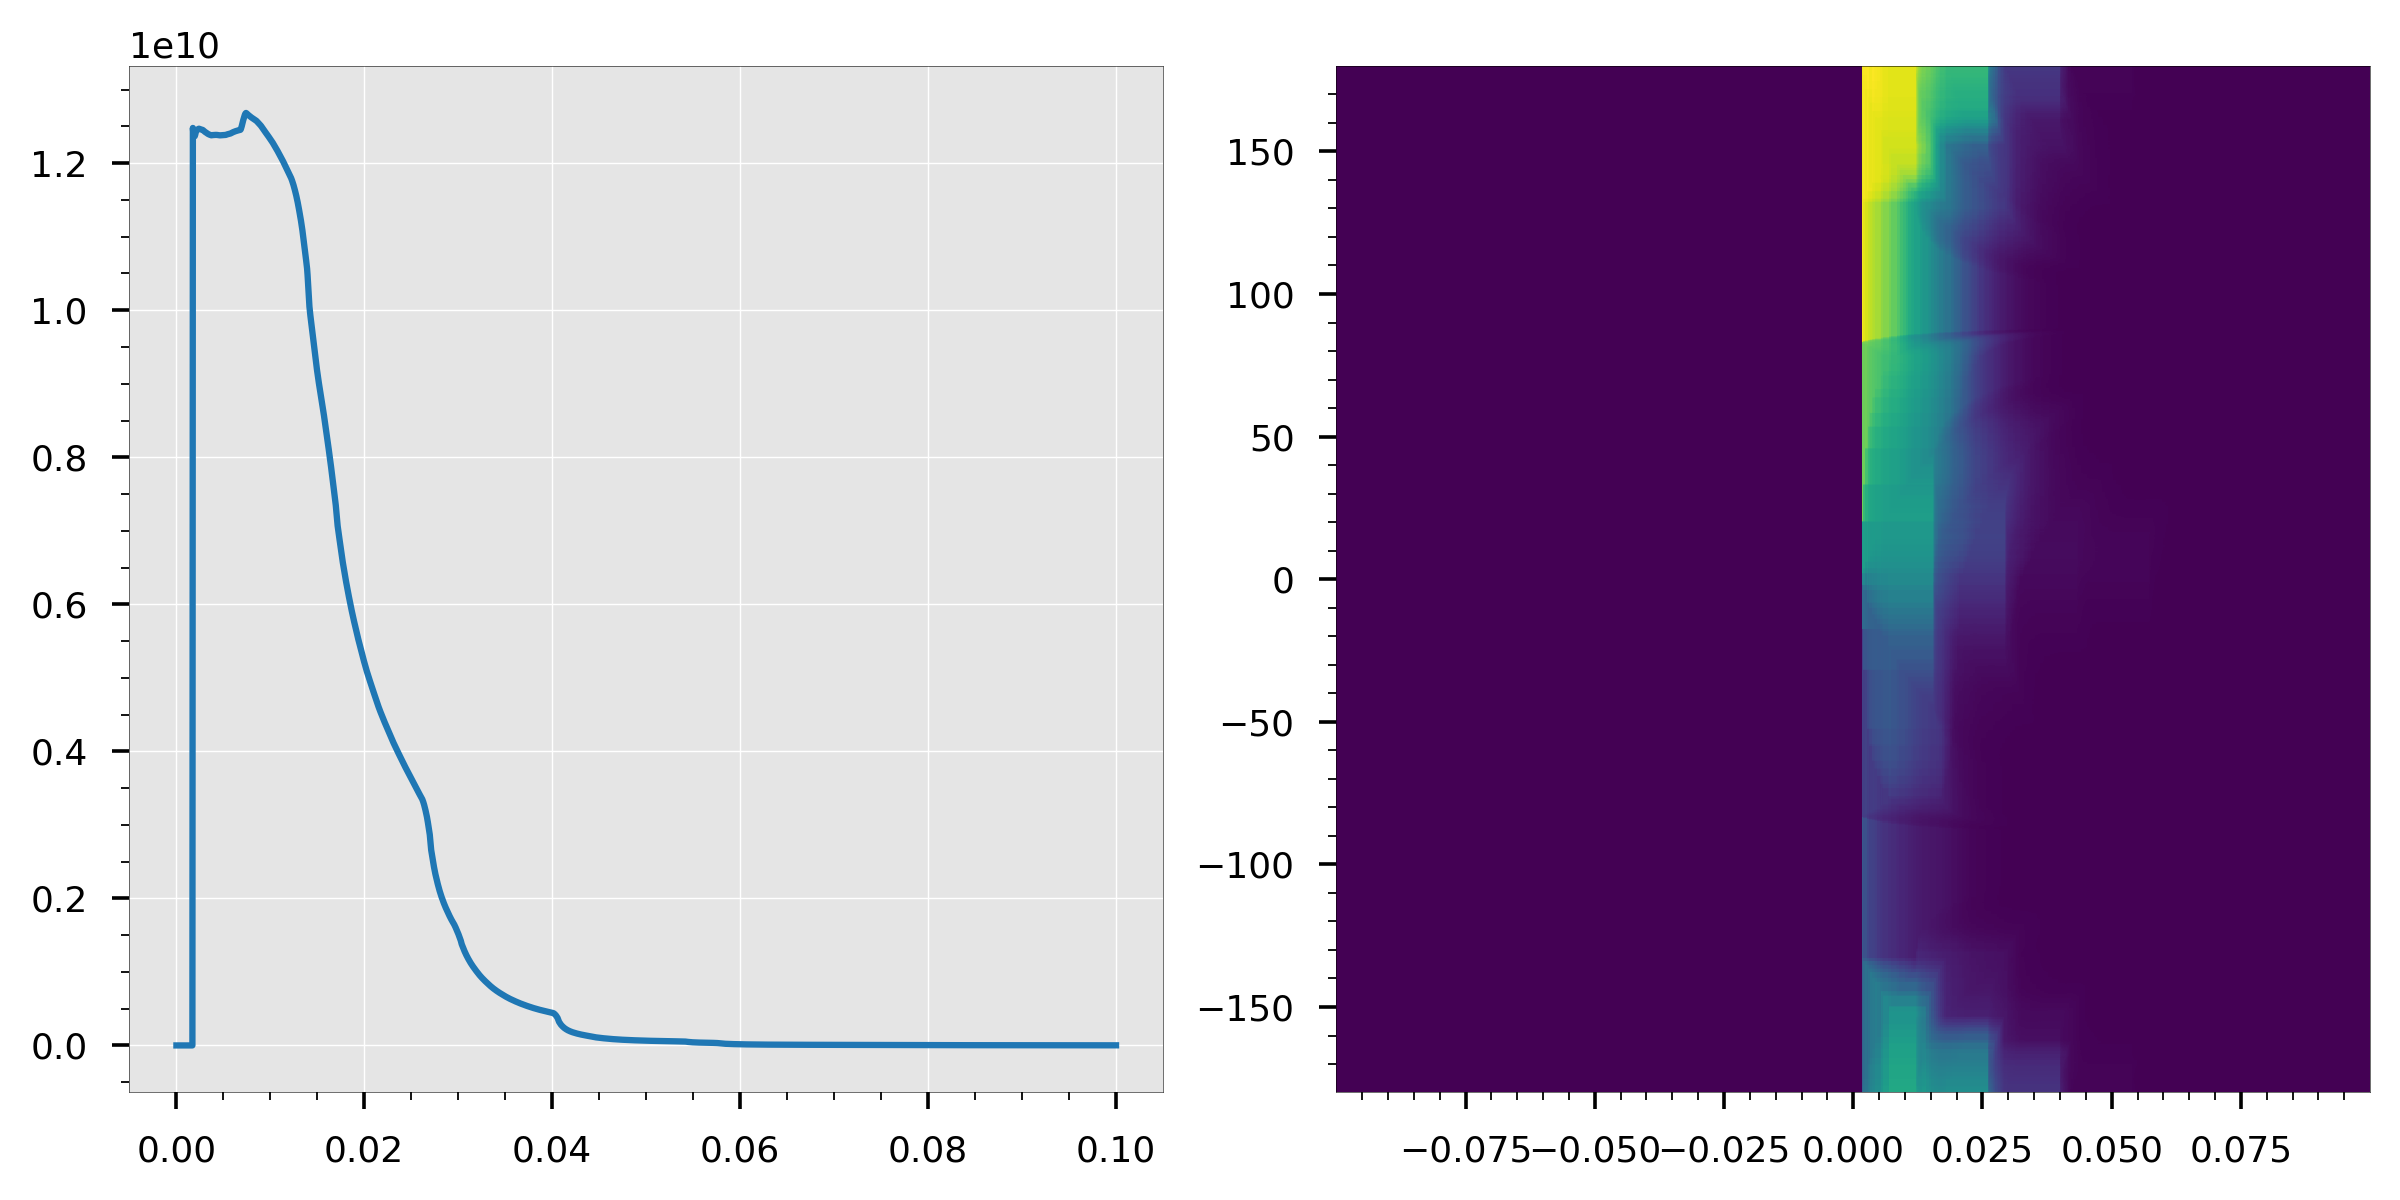

14.266500918638705


<IPython.core.display.Javascript object>


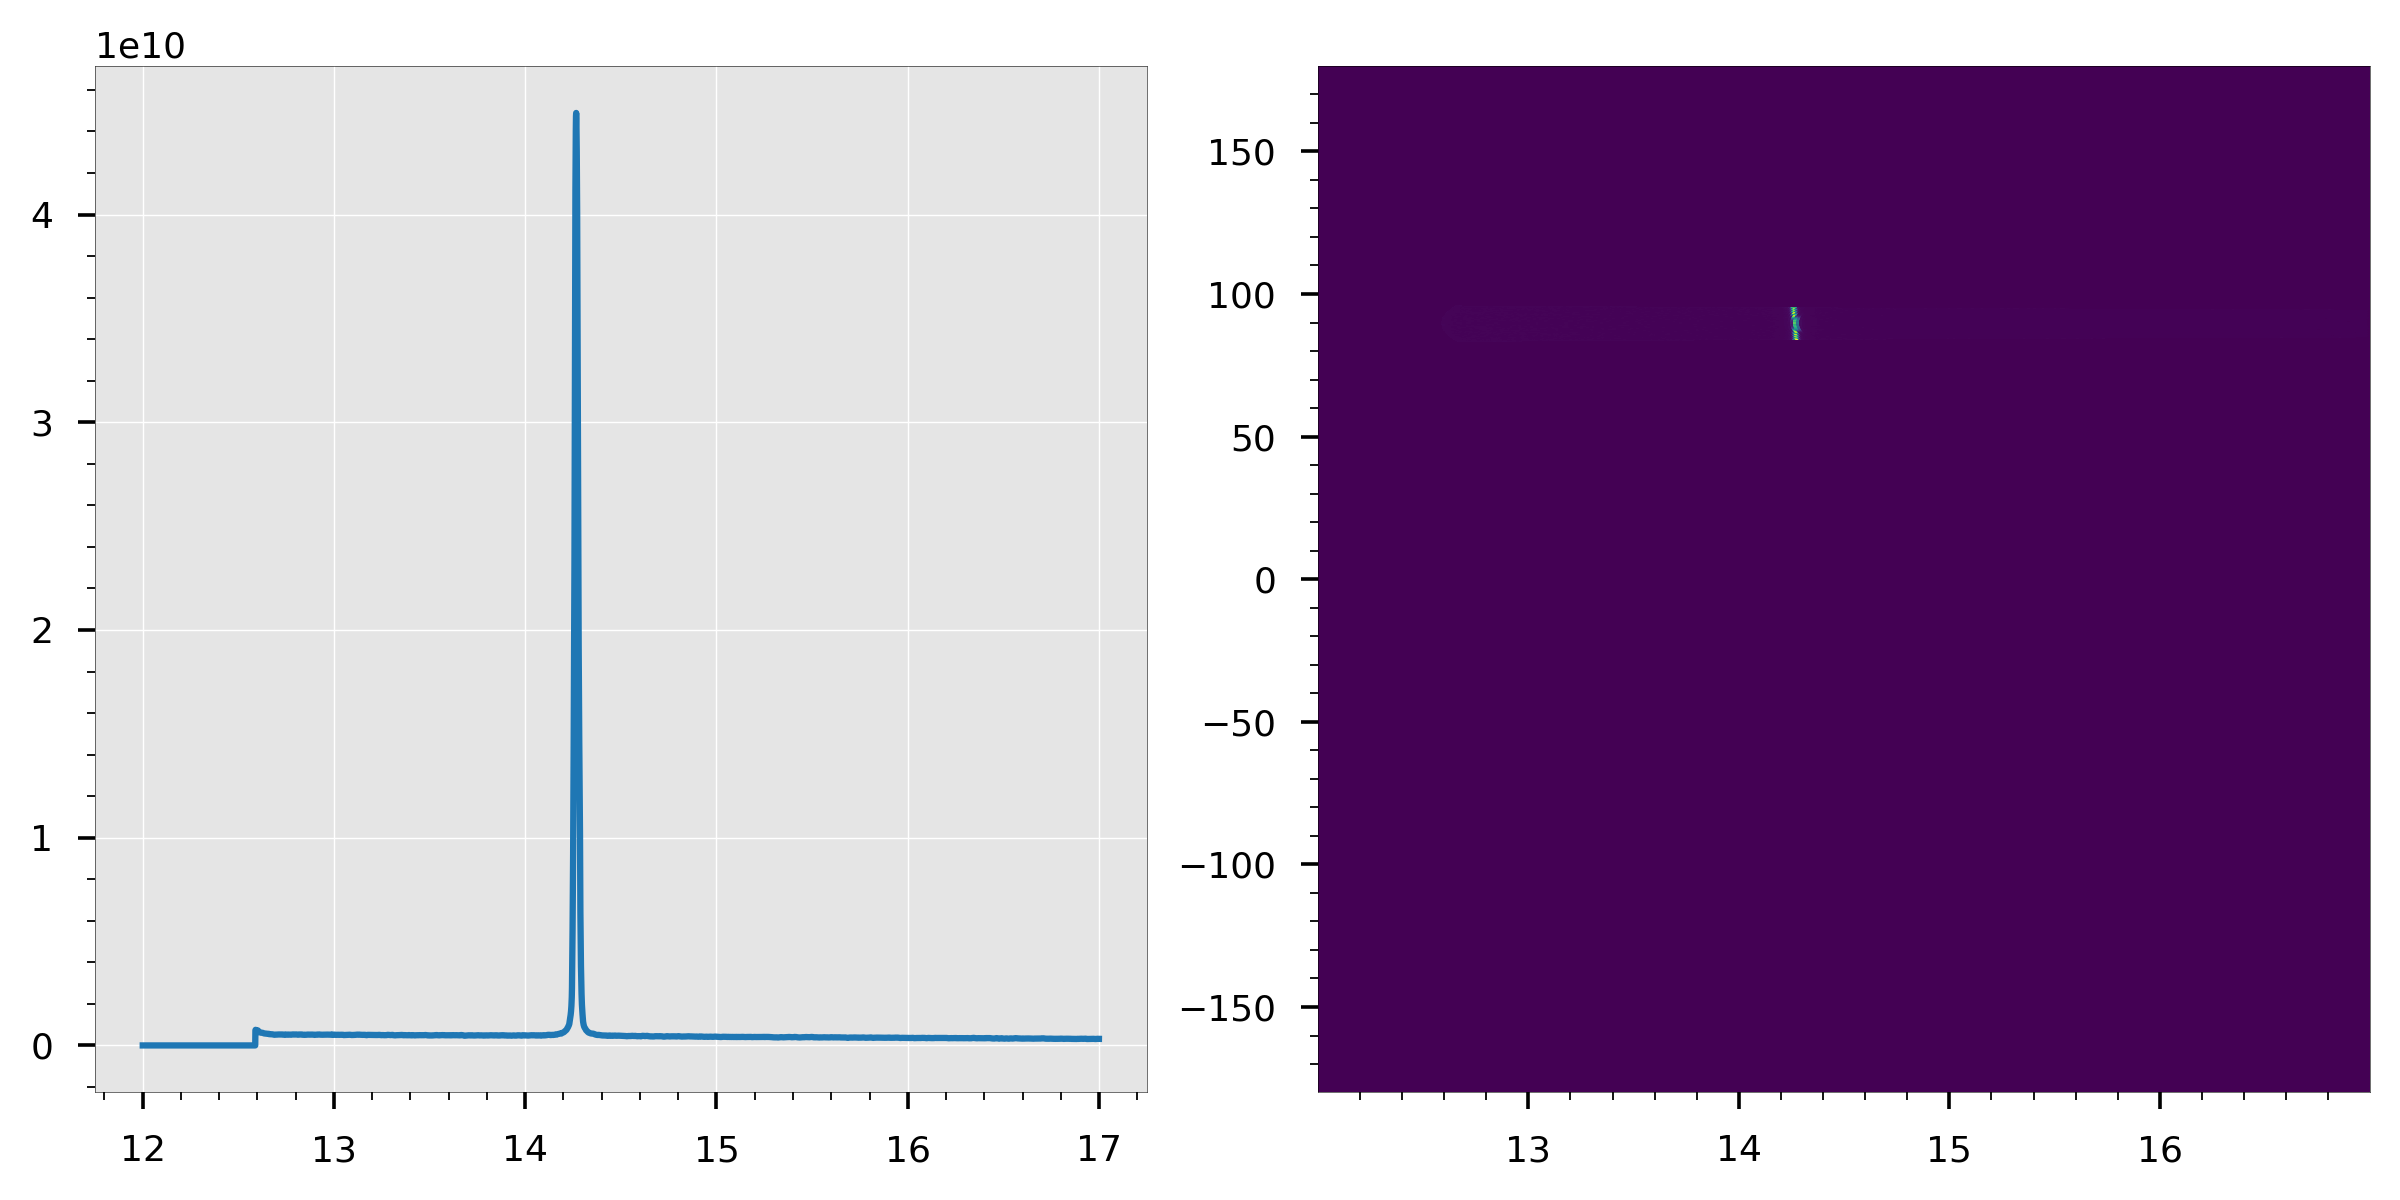

In [41]:
energy = spec_file.motor_position_by_name(0, 'Monochrom')
wavelength = 12398/energy * 1e-10
print(f'Energy: {energy}, Wavelength: {wavelength}')

poni_params = dict(
    detector = "Pilatus100k", #detector,
    dist = D,
    poni1 = poni1,
    poni2 = poni2,
    rot2  = rot2,
    rot3  = rot3,
    wavelength = wavelength
)

ai = pyFAI.azimuthalIntegrator.AzimuthalIntegrator(**poni_params)
ai.save(os.path.join(path, 'test.poni'))
print(ai)

#ai = ai_
#print(ai)

#############################################################################################
# *********** Direct Beam ************
#spec_file = SpecFile( os.path.join(spec_path, 'direct_beam_full') )

#img_fnames = sorted(fnmatch.filter(os.listdir(img_path), '*direct_beam_full_scan1*.raw'))[190:-190]
spec_file = SpecFile( os.path.join(spec_path, 'directbeam_20191219') )#''direct_beam_full') ) #LaB6_2

img_fnames = sorted(fnmatch.filter(os.listdir(img_path), '*directbeam_20191219_scan2*.raw'))[0:20] # '*direct_beam_full_scan1*.raw'))
pdi_fnames = {img_fname: f'{img_fname}.pdi' for img_fname in img_fnames
             if os.path.exists( os.path.join(pdi_path, f'{img_fname}.pdi') )}

if len(pdi_fnames) != len(img_fnames):
    print('PDI files for all images not present..')
    
TThs = {fname: get_motor_val( os.path.join(pdi_path, pdi_fname), 'TwoTheta' )
        for fname, pdi_fname in pdi_fnames.items()}

ais, imgs = [], []
for img_fname, tth in TThs.items():
    img = read_image_file( os.path.join(img_path, img_fname), return_float=True, orientation='vertical', flip=False )
    ai_tth = deepcopy(ai)
    ai_tth.rot2 -= np.deg2rad(tth)

    imgs.append(img), ais.append(ai_tth)

mg = MultiGeometry(ais, unit="2th_deg", radial_range=(-0.1, 0.1))

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

x, ii = mg.integrate1d(imgs, 2000)
ax1.plot(x, ii)

i_qChi, q, chi = mg.integrate2d(imgs, 5000, 1000)
ax2.pcolormesh(q, chi, i_qChi)
    
fig.tight_layout()

#############################################################################################
# *********** LaB6 ************

spec_file = SpecFile( os.path.join(spec_path, 'LaB6_20191219') )#''LaB6_2') )

img_fnames = sorted(fnmatch.filter(os.listdir(img_path), 'b_stone_LaB6_20191219_scan2_*.raw'))#'*b_stone_LaB6_2_scan1_*.raw'))
pdi_fnames = {img_fname: f'{img_fname}.pdi' for img_fname in img_fnames
             if os.path.exists( os.path.join(pdi_path, f'{img_fname}.pdi') )}

if len(pdi_fnames) != len(img_fnames):
    print('PDI files for all images not present..')
    
TThs = {fname: get_motor_val( os.path.join(pdi_path, pdi_fname), 'TwoTheta' )
        for fname, pdi_fname in pdi_fnames.items()}

#tths = [14.0]
img_fnames = ['b_stone_LaB6_20191219_scan2_0010.raw']#['b_stone_LaB6_2_scan1_0010.raw']

ais, imgs = [], []
for img_fname in img_fnames:
    tth = TThs[img_fname]
    
    img = read_image_file( os.path.join(img_path, img_fname), return_float=True, orientation='vertical', flip=False )
    ai_tth = deepcopy(ai)
    ai_tth.rot2 -= np.deg2rad(tth)
    
    imgs.append(img), ais.append(ai_tth)
    
mg = MultiGeometry(ais, unit="2th_deg", radial_range=(12, 17))

x, ii = mg.integrate1d(imgs, 5000)
print(x[np.argmax(ii)])
qChi2d = mg.integrate2d(imgs, 2000, 1000)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.plot(x, ii)

i_qChi, q, chi = qChi2d
ax2.pcolormesh(q, chi, i_qChi)

fig.tight_layout()

Detector Pilatus 100k	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 7.292937e-11m
SampleDetDist= 7.074985e-01m	PONI= 4.407241e-02, 1.586428e-02m	rot1=0.000000  rot2= -0.003569  rot3= 0.002423 rad
DirectBeamDist= 707.503mm	Center: x=92.234, y=241.553 pix	Tilt=0.205 deg  tiltPlanRotation= -90.000 deg
14.256500914585589


<IPython.core.display.Javascript object>


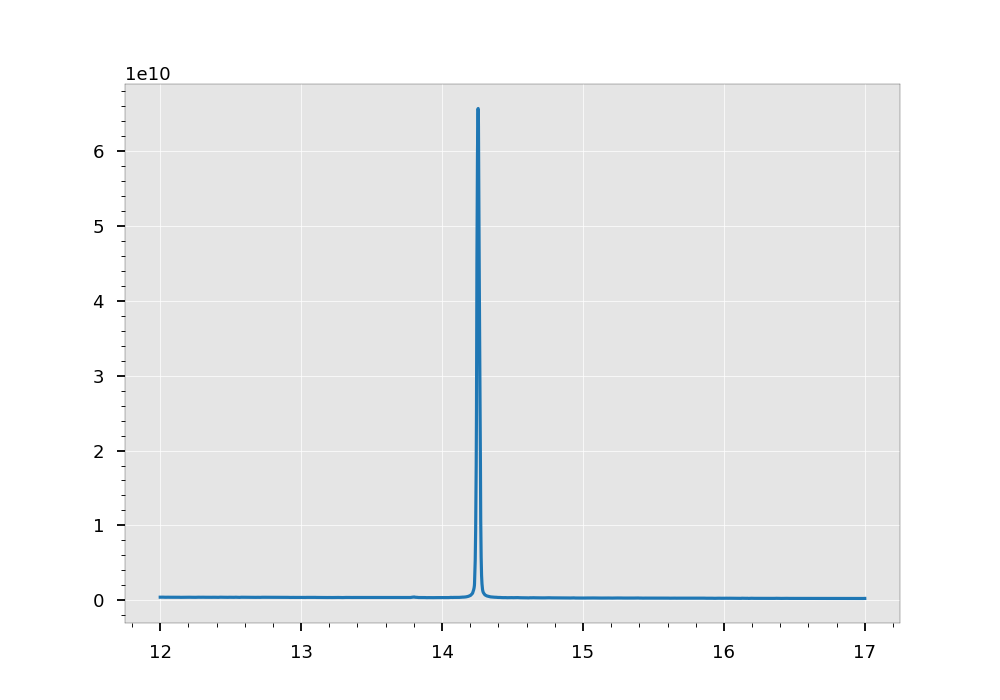

<IPython.core.display.Javascript object>


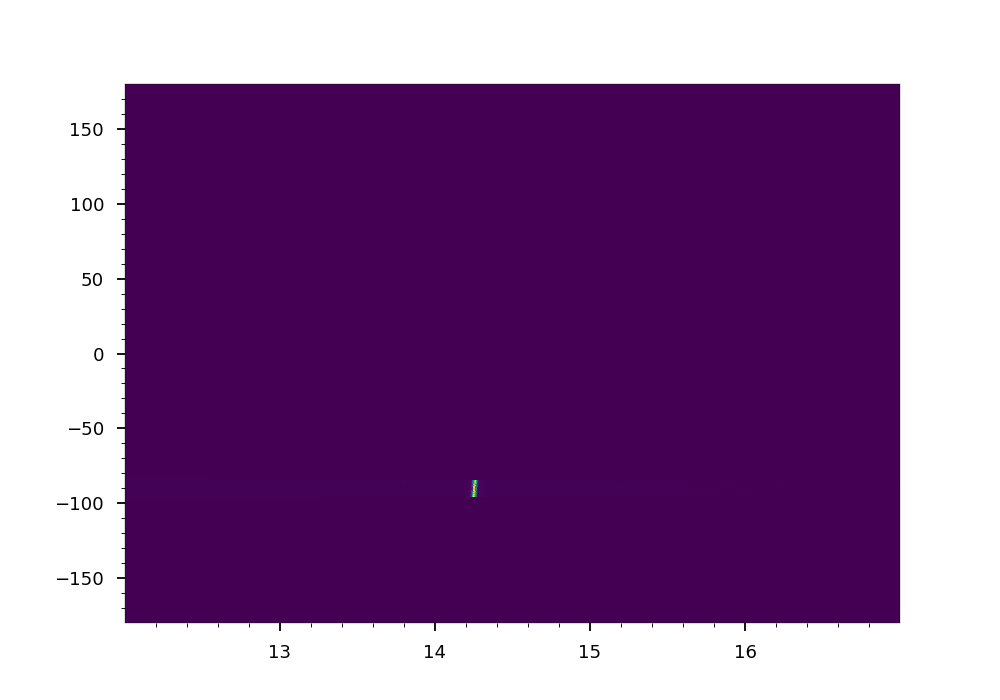

In [29]:
spec_file = SpecFile( os.path.join(spec_path, 'LaB6_2') )

img_fnames = sorted(fnmatch.filter(os.listdir(img_path), '*b_stone_LaB6_2_scan1_*.raw'))
pdi_fnames = {img_fname: f'{img_fname}.pdi' for img_fname in img_fnames
             if os.path.exists( os.path.join(pdi_path, f'{img_fname}.pdi') )}

if len(pdi_fnames) != len(img_fnames):
    print('PDI files for all images not present..')
    
TThs = {fname: get_motor_val( os.path.join(pdi_path, pdi_fname), 'TwoTheta' )
        for fname, pdi_fname in pdi_fnames.items()}

ai = pyFAI.load(os.path.join(path, 'test.poni'))#'direct_beam_scan3_poni.poni'))
print(ai)

#tths = [14.0]
img_fnames = ['b_stone_LaB6_2_scan1_0010.raw']

ais, imgs = [], []
for img_fname in img_fnames:
    tth = TThs[img_fname]
    
    img = read_image_file( os.path.join(img_path, img_fname), return_float=True, flip=True )
    ai_tth = deepcopy(ai)
    ai_tth.rot2 += np.deg2rad(tth)
    
    imgs.append(img), ais.append(ai_tth)
    
mg = MultiGeometry(ais, unit="2th_deg", radial_range=(12, 17))

x, ii = mg.integrate1d(imgs, 5000)
print(x[np.argmax(ii)])
qChi2d = mg.integrate2d(imgs, 2000, 1000)

plt.figure()
plt.plot(x, ii)

i_qChi, q, chi = qChi2d
plt.figure()
plt.pcolormesh(q, chi, i_qChi)

<IPython.core.display.Javascript object>


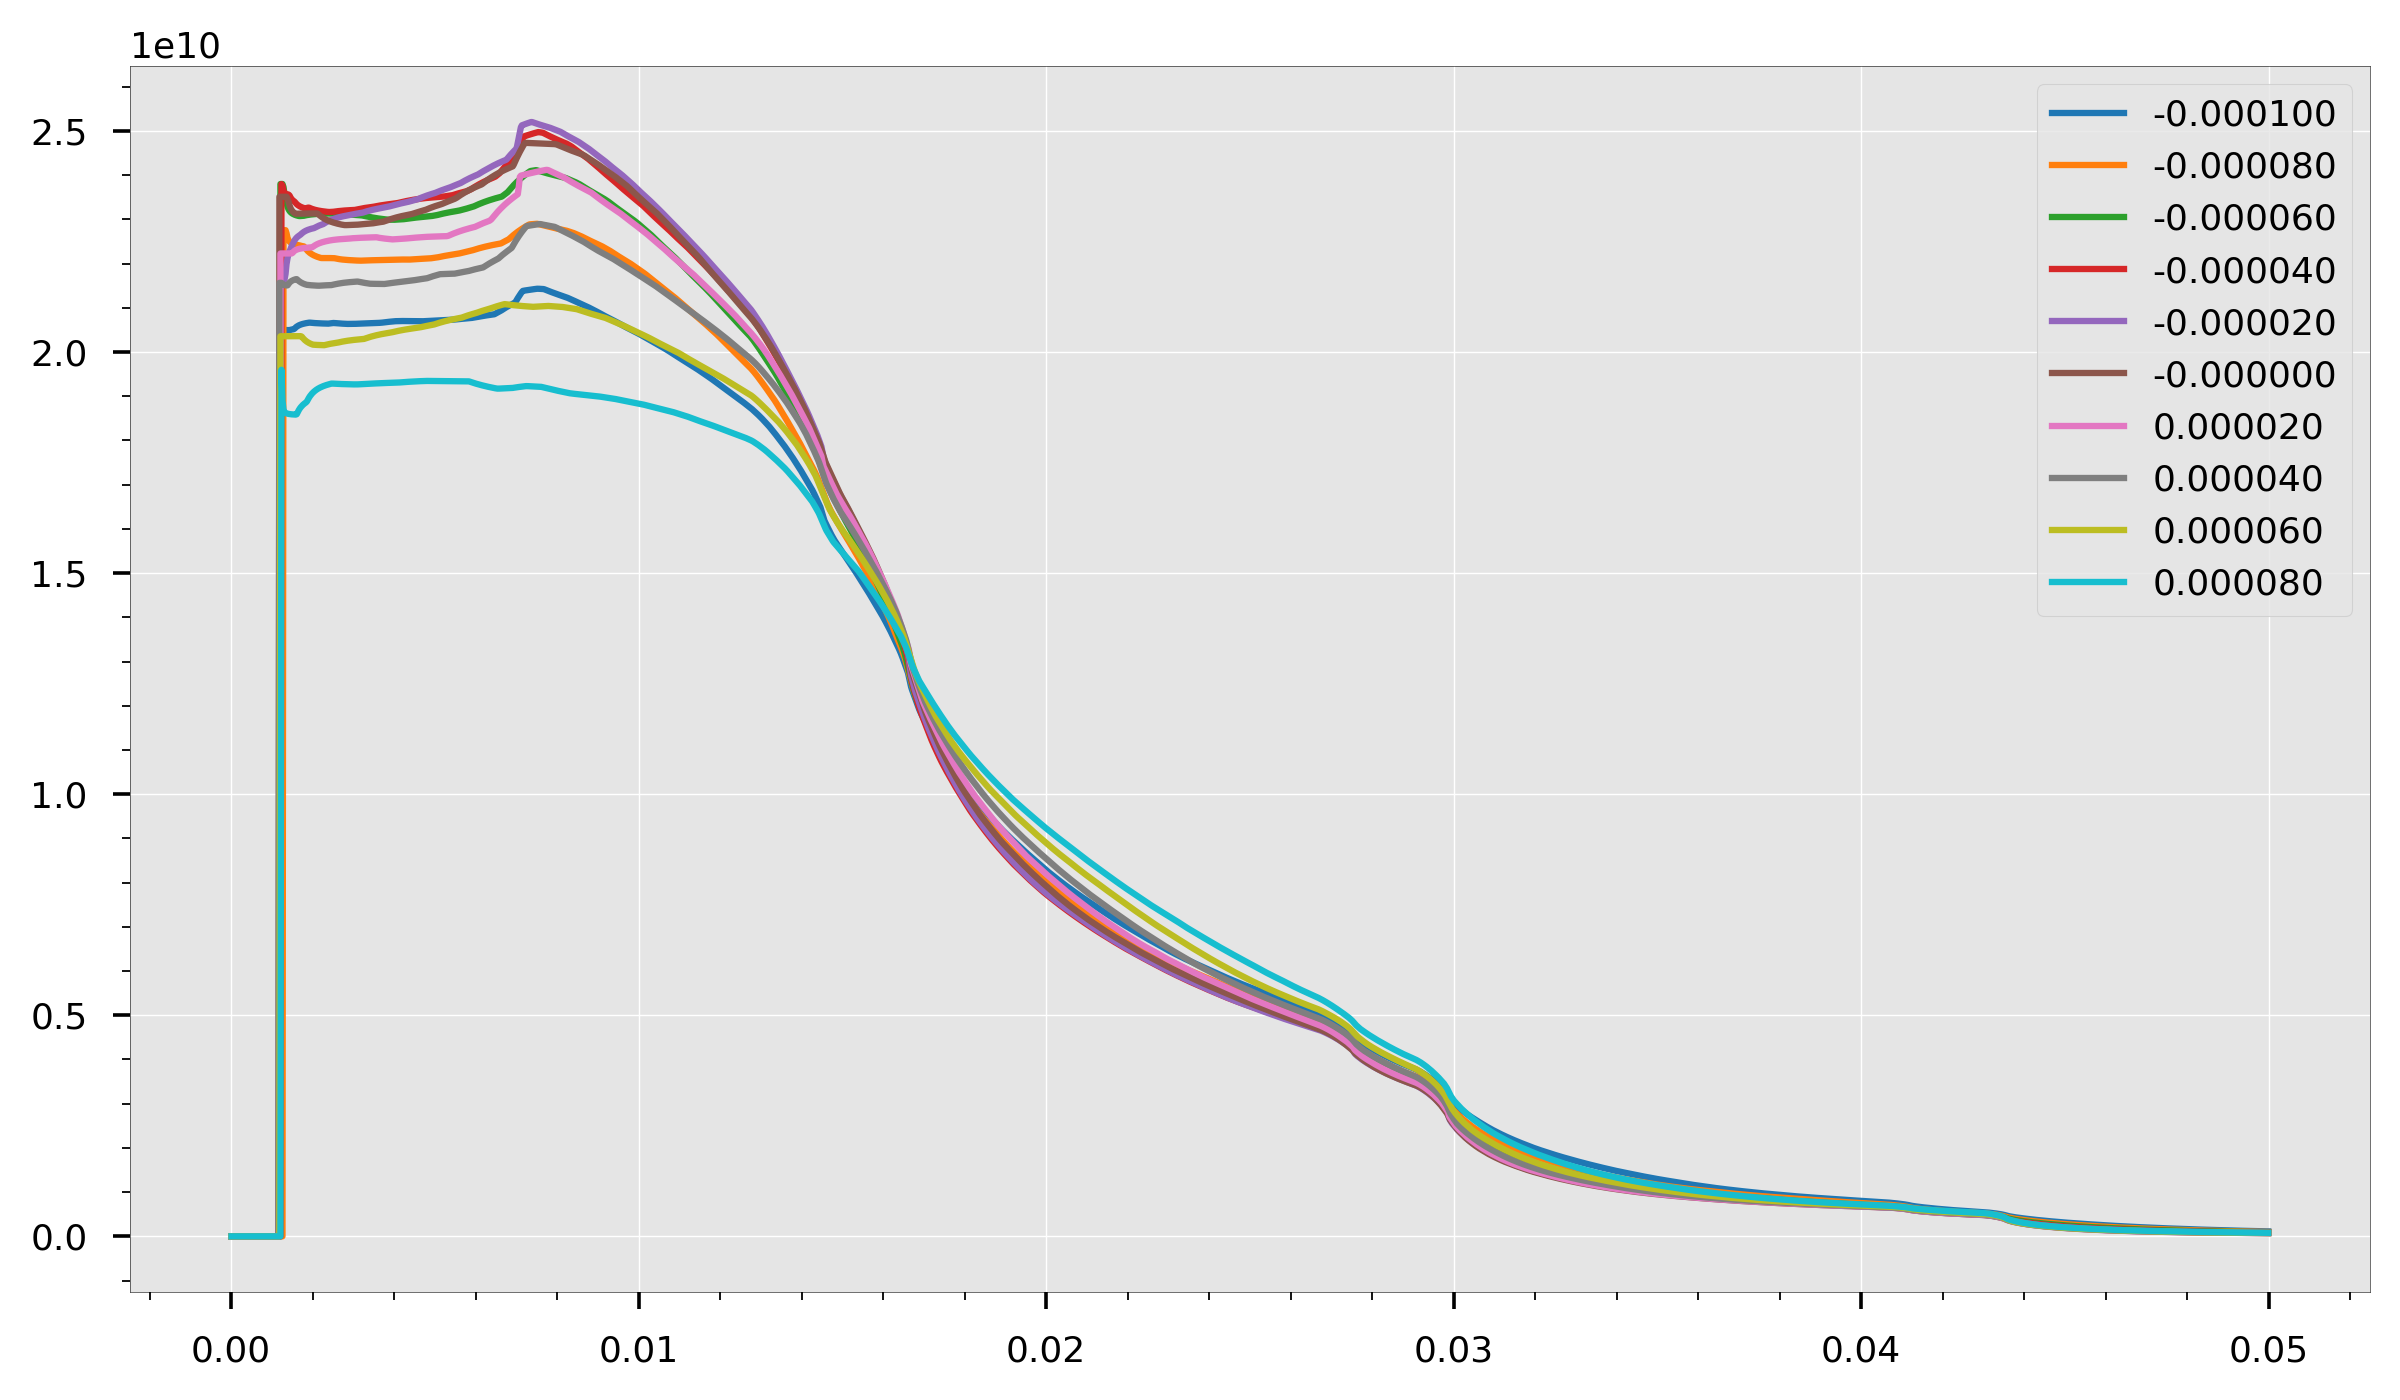

In [260]:
#fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
fig, ax1 = plt.subplots(figsize=(12, 7))

for dx in np.arange(-0.0001, 0.0001, 0.00002):
    poni2 = x0 * pixel_sz + D*np.tan(rot2)*np.sin(rot3) + 0.00015#dx
    poni1 = (485-y0) * pixel_sz - D*np.tan(rot2)*np.cos(rot3) - 0.00038 + dx

    poni_params = dict(
        detector = detector,
        dist  = D,
        poni1 = poni1,
        poni2 = poni2,
        rot2  = rot2,
        rot3  = rot3,
        wavelength = wavelength
    )

    ai = pyFAI.azimuthalIntegrator.AzimuthalIntegrator(**poni_params)
    #print(ai)
    #ai.save(os.path.join(path, 'test.poni'))
    #ai = pyFAI.load(os.path.join(path, 'test.poni'))#'direct_beam_scan3_poni.poni'))

    ais, imgs = [], []
    for img_fname, tth in TThs.items():
        img = read_image_file( os.path.join(img_path, img_fname), return_float=True, flip=True )
        ai_tth = deepcopy(ai)
        ai_tth.rot2 += np.deg2rad(tth)

        imgs.append(img), ais.append(ai_tth)

    mg = MultiGeometry(ais, unit="2th_deg", radial_range=(-0.05, 0.05))

    x, ii = mg.integrate1d(imgs, 2000)
    ax1.plot(x, ii, label=f'{dx:.6f}')
    ax1.legend()

    #i_qChi, q, chi = mg.integrate2d(imgs, 5000, 1000)
    #ax2.pcolormesh(q, chi, i_qChi)
    
fig.tight_layout()

Energy: 17000.009, Wavelength: 7.292937315503775e-11
Detector Pilatus 100k	 PixelSize= 1.720e-04, 1.720e-04 m
Wavelength= 7.292937e-11m
SampleDetDist= 7.074827e-01m	PONI= 3.835013e-02, 1.586078e-02m	rot1=0.000000  rot2= -0.005332  rot3= -0.002418 rad
DirectBeamDist= 707.493mm	Center: x=92.214, y=201.032 pix	Tilt=0.306 deg  tiltPlanRotation= -90.000 deg


<IPython.core.display.Javascript object>


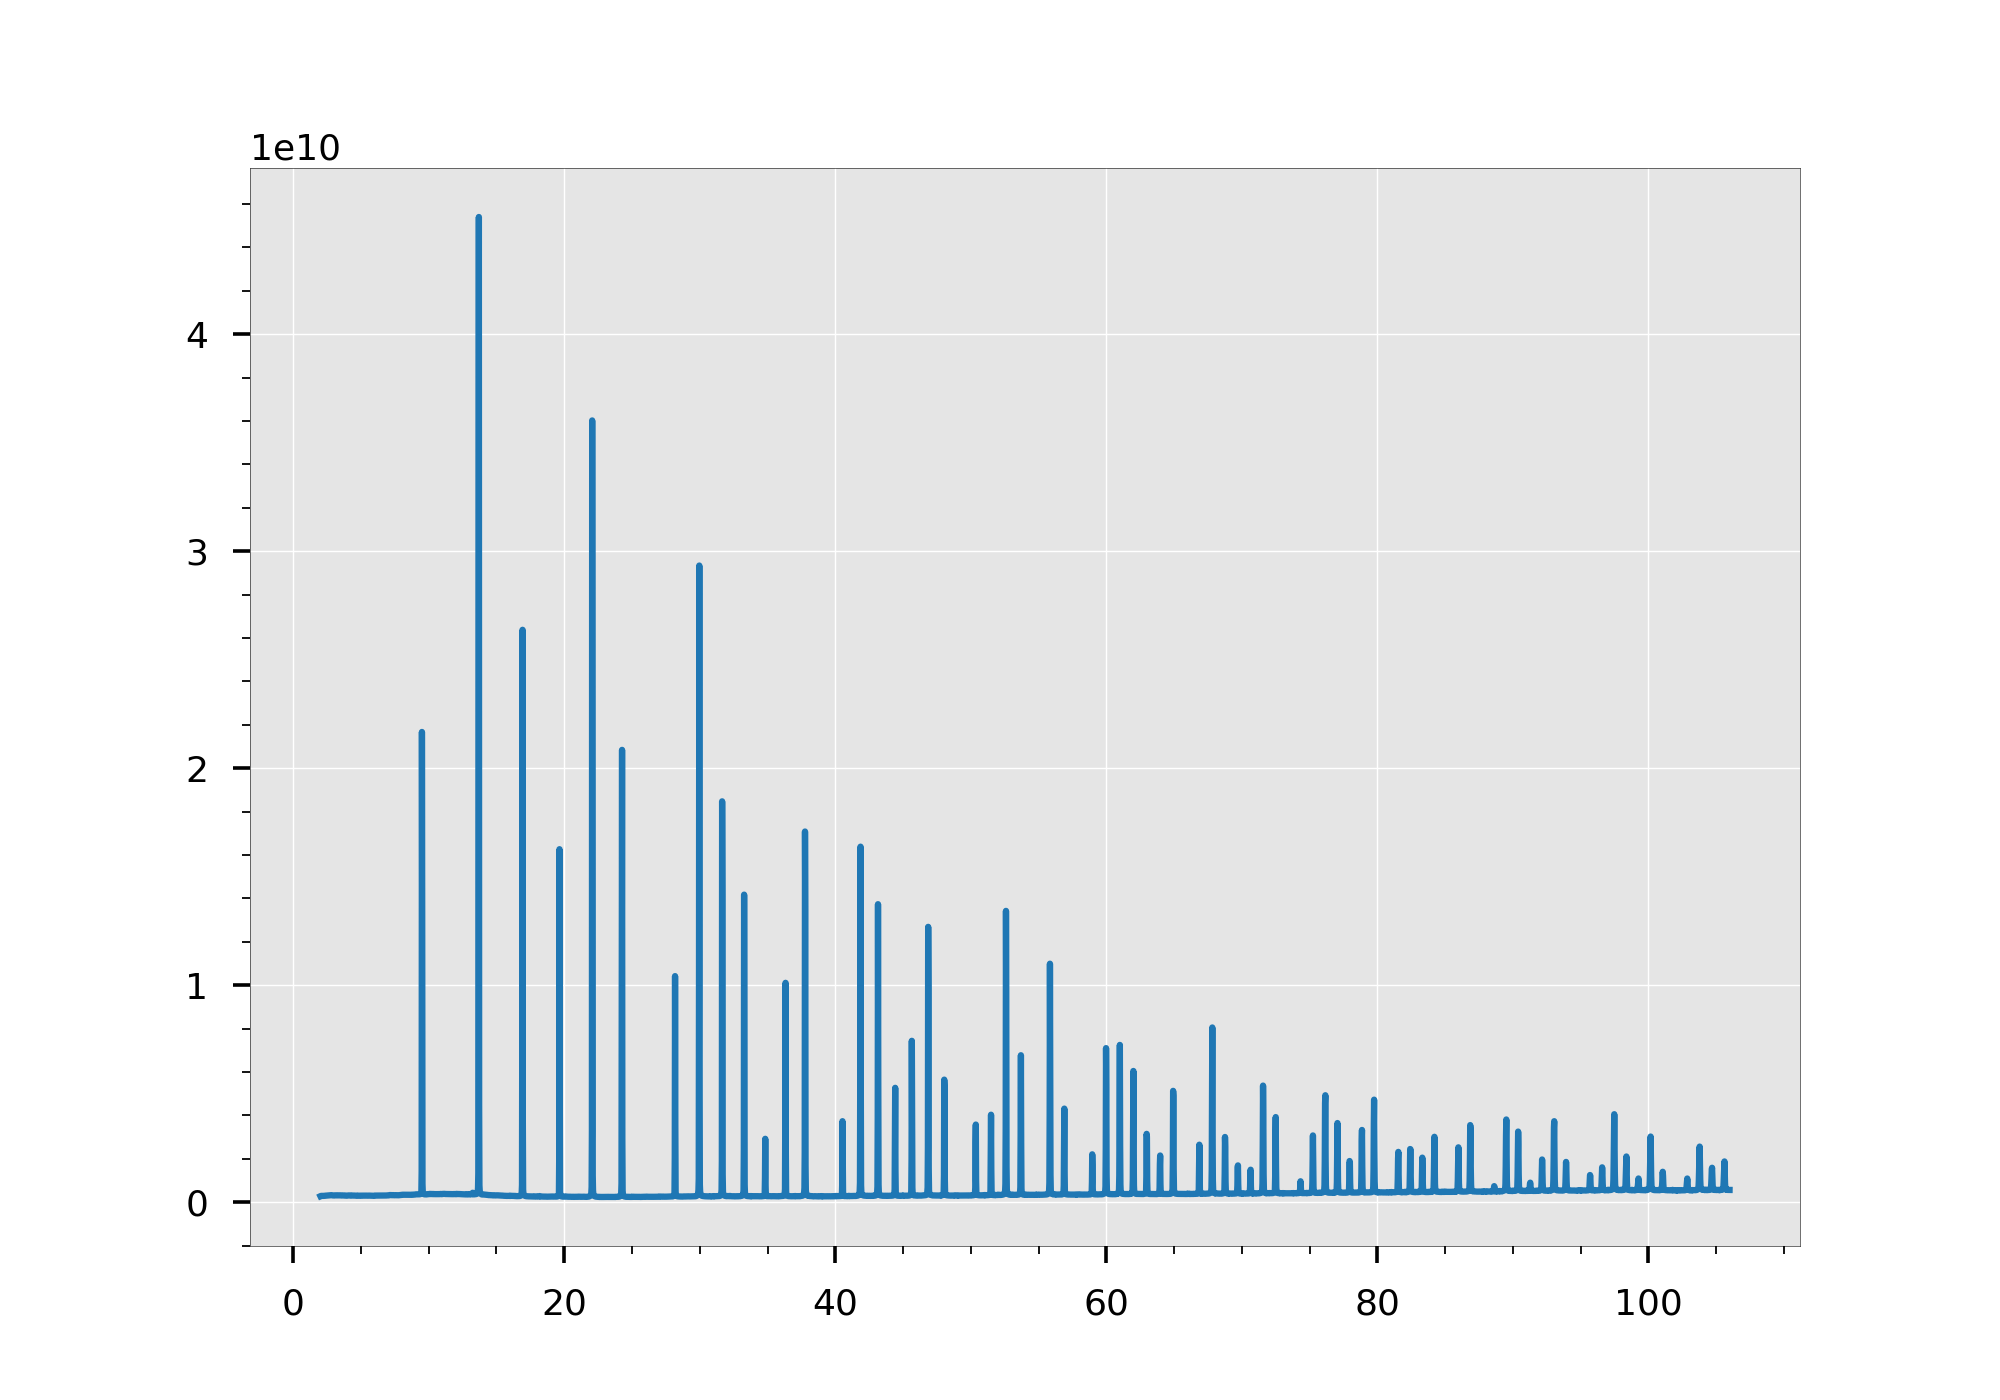

<IPython.core.display.Javascript object>


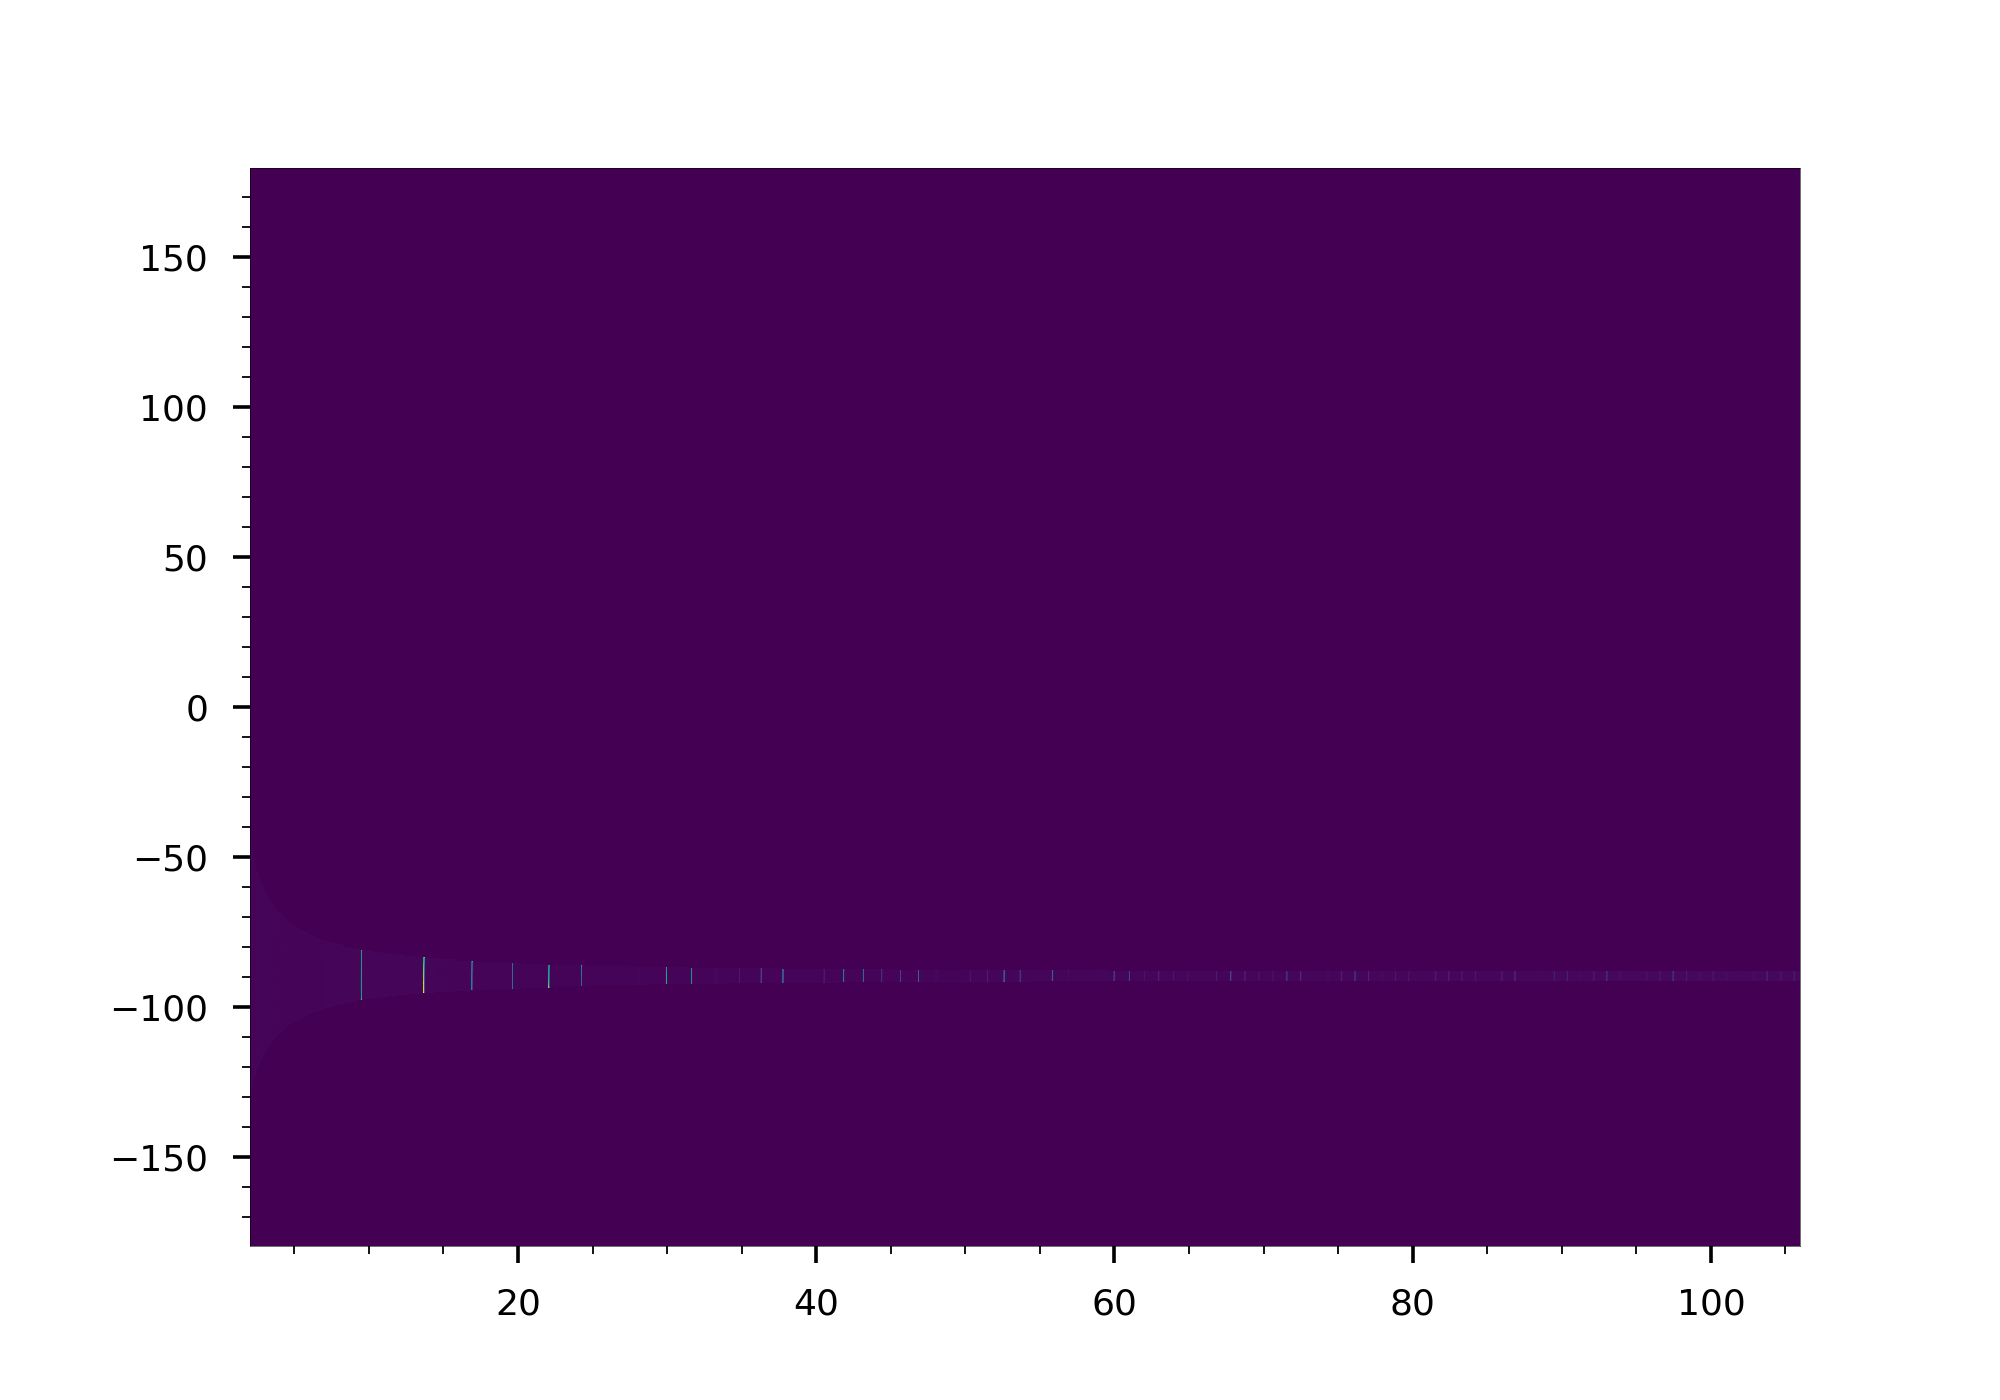

In [121]:
spec_file = SpecFile( os.path.join(spec_path, 'LaB6_2') )

img_fnames = sorted(fnmatch.filter(os.listdir(img_path), '*b_stone_LaB6_2_scan1_*.raw'))
pdi_fnames = {img_fname: f'{img_fname}.pdi' for img_fname in img_fnames
             if os.path.exists( os.path.join(pdi_path, f'{img_fname}.pdi') )}

if len(pdi_fnames) != len(img_fnames):
    print('PDI files for all images not present..')
    
TThs = {fname: get_motor_val( os.path.join(pdi_path, pdi_fname), 'TwoTheta' )
        for fname, pdi_fname in pdi_fnames.items()}

energy = spec_file.motor_position_by_name(0, 'Monochrom')
wavelength = 12398/energy * 1e-10
print(f'Energy: {energy}, Wavelength: {wavelength}')

ai = pyFAI.load(os.path.join(path, 'test.poni'))#'direct_beam_scan3_poni.poni'))
print(ai)

ais, imgs = [], []
for img_fname, tth in TThs.items():
    
    img = read_image_file( os.path.join(img_path, img_fname), return_float=True, flip=True )
    ai_tth = deepcopy(ai)
    ai_tth.rot2 += np.deg2rad(tth)
    
    imgs.append(img), ais.append(ai_tth)
    
mg = MultiGeometry(ais, unit="2th_deg", radial_range=(2, 106))

x, ii = mg.integrate1d(imgs, 5000)
qChi2d = mg.integrate2d(imgs, 2000, 1000)

plt.figure()
plt.plot(x, ii)

i_qChi, q, chi = qChi2d
plt.figure()
plt.pcolormesh(q, chi, i_qChi)

In [ ]:
    output = np.column_stack((tth,ii))
    
    np.savetxt('E:/Dropbox/beamtime data/19Feb08_BL21_ZnCaPlating/Ca calibration_Au/%s.tth'%files[0], output)
#     np.savetxt('%s.tth'%files[0], output)
    return  tth, ii, tthChi2d


def process_100K(files, centerx=245.507, centery=17.066, sdd=0.2813, sa = 10, ea=30, ra=20, stepSize=20):
    "returns tth/intensity array"
    

    imgs = []
    ais = []

    start_angle = sa
    end_angle = ea
    
    numbPoints = stepSize
        
    step = (end_angle-start_angle)/numbPoints * np.pi/180
    
    for i in range(numbPoints):
        fn = files[i]
        img = read_raw_100k(fn)
        my_ai = deepcopy(ai)
        my_ai.rot2 += (i-ra+sa) * step
        imgs.append(img)
        ais.append(my_ai)

    mg = MultiGeometry(ais, unit="2th_deg", radial_range=(9,31))
    
    tth, ii = mg.integrate1d(imgs,5000)
    
    tthChi2d = mg.integrate2d(imgs,300, 2000) ### best to check the number of points in chi and tth here

    output = np.column_stack((tth,ii))
    
    np.savetxt('E:/Dropbox/beamtime data/19Feb08_BL21_ZnCaPlating/Ca calibration_Au/%s.tth'%files[0], output)
#     np.savetxt('%s.tth'%files[0], output)
    return  tth, ii, tthChi2d

## Fit to get rot2 and D 

<IPython.core.display.Javascript object>


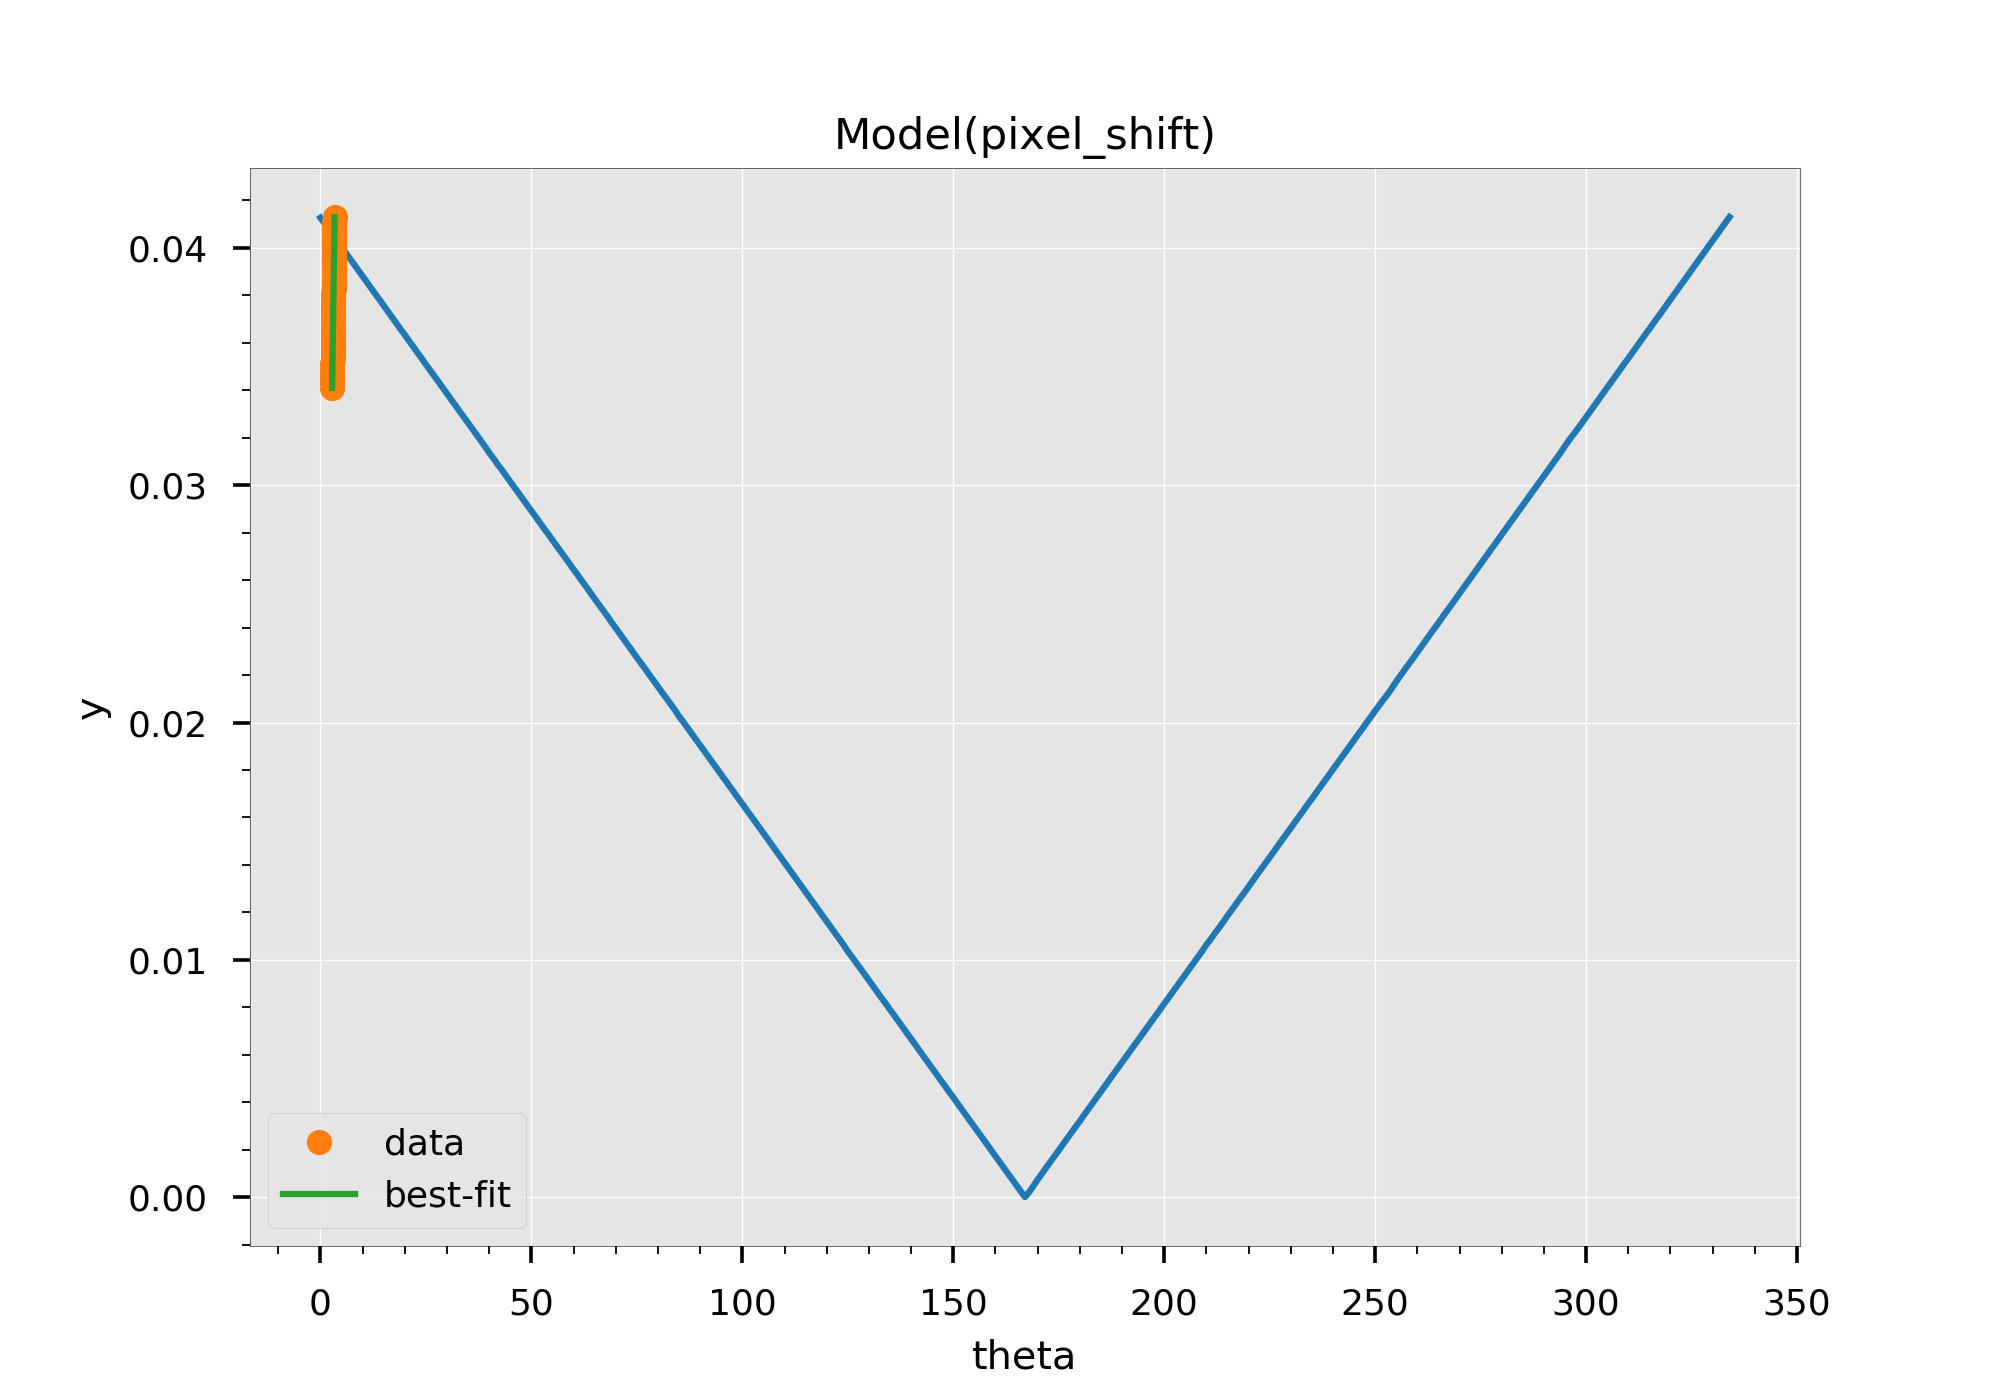

In [30]:
pixel_sz=0.000172
d = np.sqrt( (xs - x0)**2 + (ys - y0)**2 ) * pixel_sz

plt.figure()
plt.plot(d)

<IPython.core.display.Javascript object>


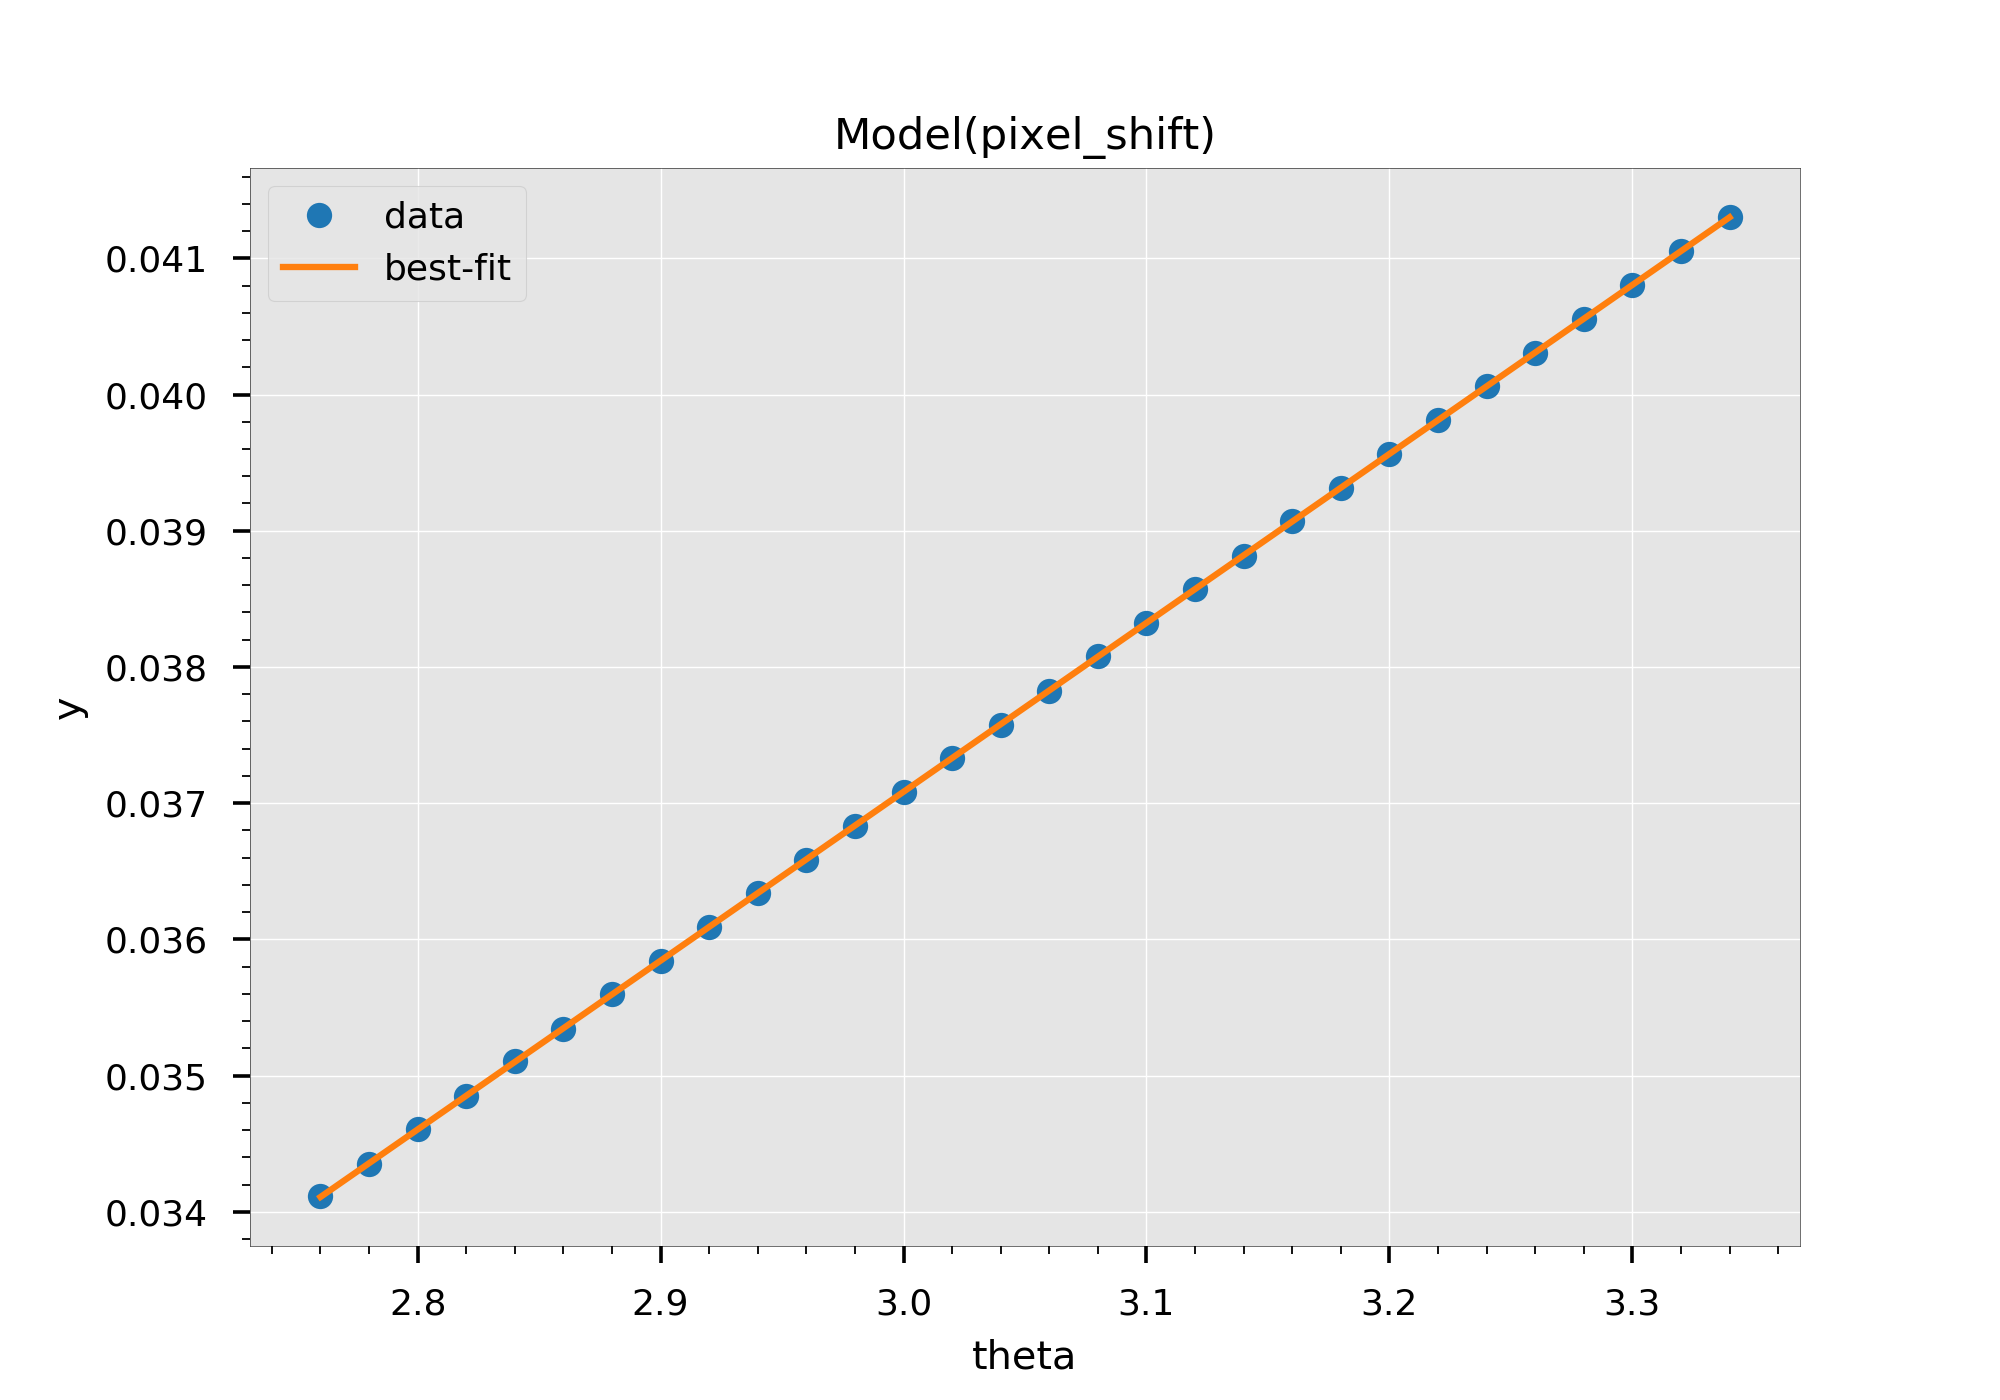

In [44]:
pixel_sz=0.000172
d = np.sqrt( (xs - x0)**2 + (ys - y0)**2 ) * pixel_sz

def pixel_shift(theta, D, alpha):
    theta = np.deg2rad(theta)
    alpha = np.deg2rad(alpha)
    
    return D * np.sin(theta) / ( np.cos(alpha) * np.cos(alpha + theta) )

gmodel = Model(pixel_shift)
gmodel.independent_vars

params = gmodel.make_params(D=D, alpha=np.rad2deg(rot2))
result = gmodel.fit(d[-30:], params, theta=tths[-30:])

plt.figure()
result.plot_fit()

result

In [39]:
mod_2D = plane_mod + lor2D_mod
out = mod_2D.fit(ydata, pars, x=x)

# Define and constrain parameters 
plane_mod = PlaneModel()
lor2D_mod = LorentzianSquared2DModel()

mod_2D = plane_mod + lor2D_mod

mod_2d.param_names
mod_2d.set_param_hint('sigma_y', expr='sigma_x')
pars = mod_2d.make_params(amplitude=150.0,
                   center_x=480.0,
                   center_y=480.0,
                   sigma_x=150.0,
                   sigma_y=200.0,
                   intercept=50.0,
                   slope_x=0.0,
                   slope_y=0.0)

mod_2d.missing = 'drop'

out = mod_2D.fit(ydata, pars, x=x)


# Fit results
print(out.fit_report())
I_fit = out.eval(x=[rows.flatten(), cols.flatten()])

plt.figure()
plt.imshow(Images, vmin=40, vmax=100, interpolation='none')
plt.colorbar()

plt.figure()
plt.imshow(I_fit.reshape(960,960), vmin=40, vmax=100, interpolation='none')
plt.colorbar()

NameError: name 'mod_2d' is not defined

$$D = \frac{2 d_1 d_2 cos(\theta)}{\sqrt{(d_1 + d_2)^2 - 4 d_1 d_2 cos(\theta)}}$$

Above is not quite right
$$D = \frac{2 d_1 d_2 (d_1 + d_2) tan(\theta)}{(d_1 + d_2)^2 tan^2(\theta) + (d_1 - d_2)^2}$$


$$cos (\alpha) = \frac{(d_1 + d_2) sin(\theta)}{\sqrt{(d_1 + d_2)^2 - 4 d_1 d_2 cos(\theta)}}$$

$$d_1 = \sqrt( (y_1 - y_0)^2 + (x_1 - x_0)^2 )$$
$$d_2 = \sqrt( (y_2 - y_0)^2 + (x_2 - x_0)^2 )$$
$$tan(rot3) = \frac{x_1 - x_2}{y_1 - y_2}$$

Here $d_1$ and $d_2$ are the distances the direct beam moves along the detector when the TwoTheta arm is moved $\pm \theta$ degrees from $0$. ($x_0$, $y_0$) is the direct beam pixel at $tth=0$ degrees. ($x_1$, $y_1$) and ($x_2$, $y_2$) are the direct beam pixels at $tth = \pm \theta$ degrees.

#tths   = [get_motor_val(f, 'TwoTheta') for k, f in pdi_fpaths.items()]
tths = [get_motor_val( os.path.join(pdi_path, f), 'TwoTheta' ) for f in pdi_fnames]

img_mean_vals = np.zeros(len(img_fnames))
for idx, img_fname in enumerate(img_fnames):
    img = read_image_file( os.path.join(img_path, img_fname), return_float=True )
    img_mean_vals[idx] = np.mean(img)

# for idx, (img_fname, img_path) in enumerate(img_fpaths.items()):
#     img = read_image_file(img_path, return_float=True)
#     img_mean_vals[idx] = np.mean(img)
    
median_mean_vals = np.median(img_mean_vals)

TThs = {}
no_peaks = []
for idx, (img_fname, img_fpath) in enumerate(img_fpaths.items()):
    img = read_image_file(img_fpath, return_float=True)
    if np.mean(img) > median_mean_vals/3.:
        TThs[img_fname] = get_motor_val(pdi_fpaths[img_fname], 'TwoTheta')
    else:
        no_peaks.append(img_fname)

for key in no_peaks:
    del img_fpaths[key]
    del pdi_fpaths[key]
        
plt.figure()
plt.plot(img_mean_vals)

<IPython.core.display.Javascript object>


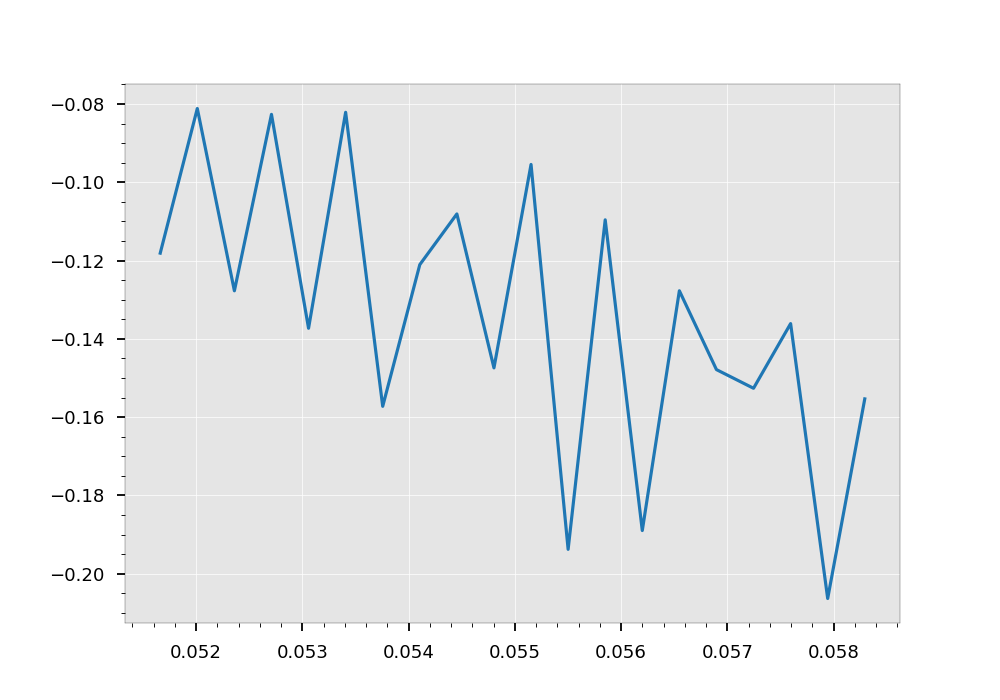

<IPython.core.display.Javascript object>


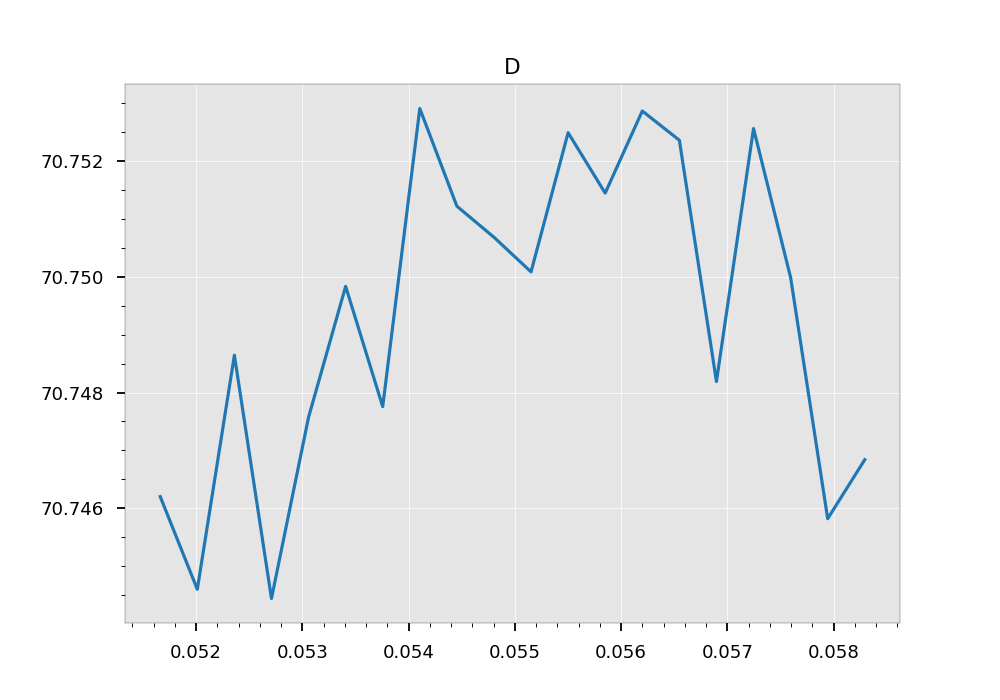

<IPython.core.display.Javascript object>


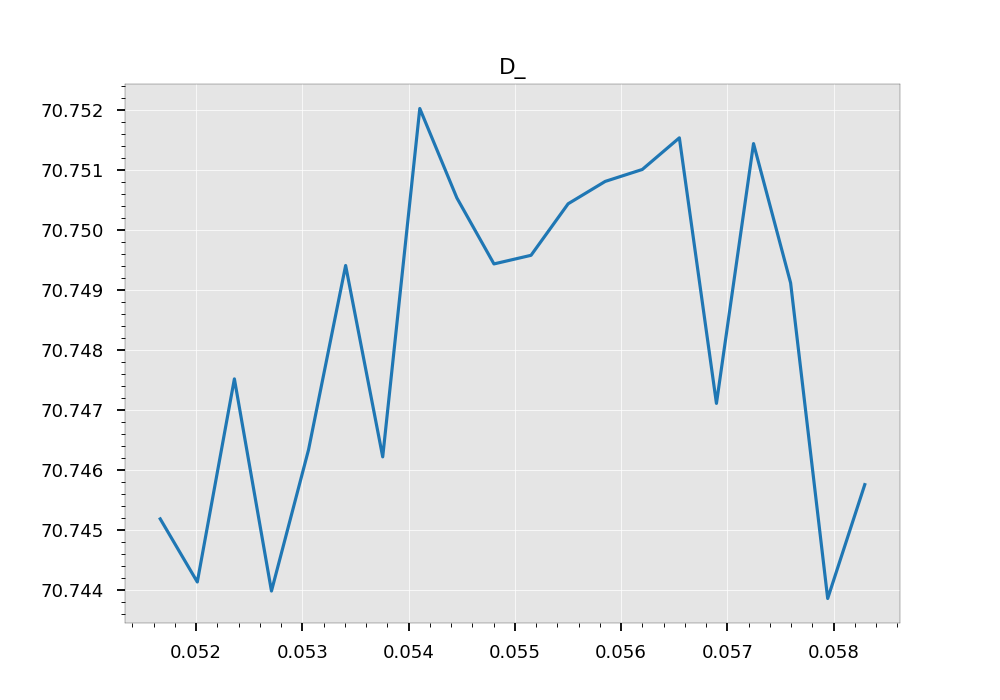

<IPython.core.display.Javascript object>


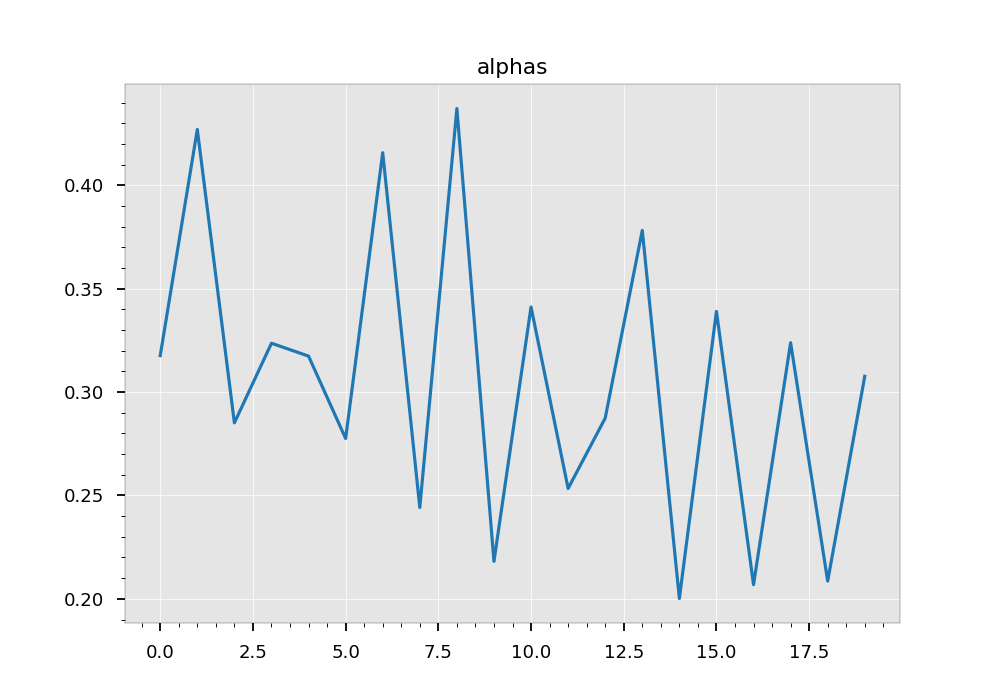

<IPython.core.display.Javascript object>


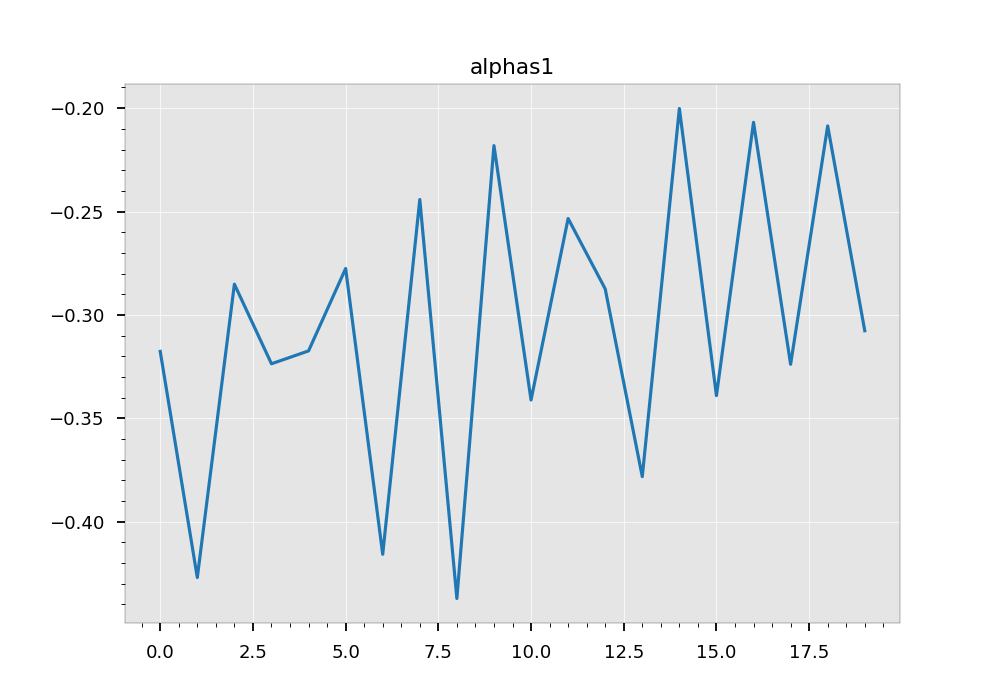

<IPython.core.display.Javascript object>


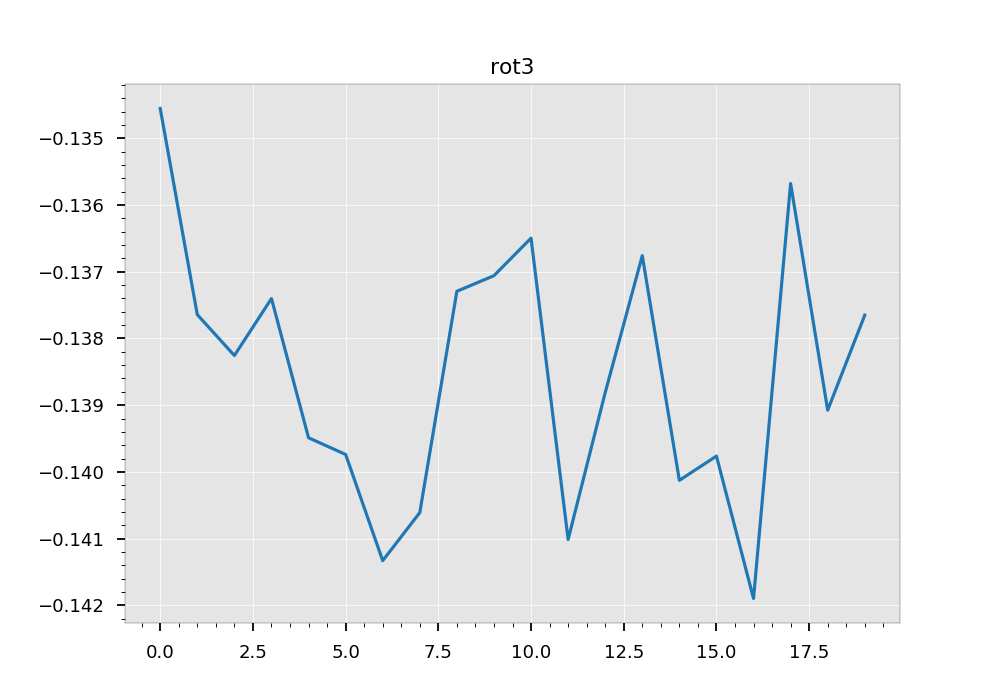

Text(0.5, 1.0, 'rot3')

In [16]:
tths_ = sorted(Fit_Results.keys())

n0 = len(tths_)//2; tth0 = tths_[n0]
x0, y0 = Fit_Results[tth0].params['center_y'], Fit_Results[tth0].params['center_x']

xys = []
ds, Ds, alphas, alphas1, rot3s, all_tths = [], [], [], [], [], []
D_s = []
for ii in range(0, n0):
    tth1, tth2 = tths_[ii].astype(np.float128), tths_[-ii-1].astype(np.float128)
    x1, y1 = Fit_Results[tth1].params['center_y'], Fit_Results[tth1].params['center_x']
    x2, y2 = Fit_Results[tth2].params['center_y'], Fit_Results[tth2].params['center_x']
    
    xys.append(np.asarray([x1, y1, x2, y2]))
    
    d1 = np.sqrt( (x1 - x0)**2 + (y1 - y0)**2 )
    d2 = np.sqrt( (x2 - x0)**2 + (y2 - y0)**2 )
    
    ds.append(np.asarray([d1,d2]))
    
    tth = np.deg2rad (abs(tth1))
    
    D = 2 * d1 * d2 * np.cos(tth) / np.sqrt(
        (d1 + d2)**2 - 4 * d1 * d2 * np.cos(tth)**2 ) * 0.0172
    
    D_ = 2 * d1 * d2 * (d1 + d2) * np.tan(tth) / (
        (d1 + d2)**2 * np.tan(tth)**2  + (d1 - d2)**2 ) * 0.0172

    alpha = np.arccos( (d1 + d2) * np.sin(tth) / np.sqrt(
        (d1 + d2)**2 - 4 * d1 * d2 * np.cos(tth)**2 ) ) * 180/np.pi
    
    alpha1 = np.rad2deg( np.arctan( 1/np.tan(tth) * (d1 - d2) / (d1 + d2) ) )
    
    rot3 = np.rad2deg( (x1 - x2) / (y1 - y2) )
    
    Ds.append(D)
    D_s.append(D_)
    alphas.append(alpha)
    alphas1.append(alpha1)
    rot3s.append(rot3)
    all_tths.append(tth)

ds = np.asarray(ds); xys = np.asarray(xys)

d1, d2 = ds[:,0], ds[:,1] 

plt.figure()
#plt.plot(d1)
#plt.plot(d2)
plt.plot(all_tths, d1-d2)

plt.figure()
plt.plot(all_tths, Ds[:])
plt.title('D')

plt.figure()
plt.plot(all_tths, D_s[:])
plt.title('D_')

plt.figure()
plt.plot(alphas[:])
plt.title('alphas')

plt.figure()
plt.plot(alphas1[:])
plt.title('alphas1')

plt.figure()
plt.plot(rot3s[:])
plt.title('rot3')

In [ ]:
pilatus = pyFAI.detector_factory("Pilatus100k", config={'max_shape':(487, 195)})

poni_params = dict(
    detector = pilatus,
    dist = 0.707696,
    poni1 = 0.04214,
    poni2 = 0.015824,
    wavelength = 7.292937e-11,
)

ai = pyFAI.azimuthalIntegrator.AzimuthalIntegrator(**poni_params)
ai.save(os.path.join(path, 'test.poni'))

#tths   = [get_motor_val(f, 'TwoTheta') for k, f in pdi_fpaths.items()]
tths = [get_motor_val( os.path.join(pdi_path, f), 'TwoTheta' ) for f in pdi_fnames]

img_mean_vals = np.zeros(len(img_fnames))
for idx, img_fname in enumerate(img_fnames):
    img = read_image_file( os.path.join(img_path, img_fname), return_float=True )
    img_mean_vals[idx] = np.mean(img)

# for idx, (img_fname, img_path) in enumerate(img_fpaths.items()):
#     img = read_image_file(img_path, return_float=True)
#     img_mean_vals[idx] = np.mean(img)
    
median_mean_vals = np.median(img_mean_vals)

TThs = {}
no_peaks = []
for idx, (img_fname, img_fpath) in enumerate(img_fpaths.items()):
    img = read_image_file(img_fpath, return_float=True)
    if np.mean(img) > median_mean_vals/3.:
        TThs[img_fname] = get_motor_val(pdi_fpaths[img_fname], 'TwoTheta')
    else:
        no_peaks.append(img_fname)

for key in no_peaks:
    del img_fpaths[key]
    del pdi_fpaths[key]
        
plt.figure()
plt.plot(img_mean_vals)

In [6]:
Fit_Results, FNames, Img_Fits, Init_Params = dict(), dict(), dict(), dict()

n_cores = mp.cpu_count()
_ = Parallel(n_jobs=n_cores, require='sharedmem') (
    delayed(fit_images_2D)(os.path.join(img_path, fname), tth, function='pvoigt',
                           kernel_size=3, window_size=1,
                           Fit_Results=Fit_Results, FNames=FNames, Img_Fits=Img_Fits, Init_Params=Init_Params,
                           verbose='True', orientation='vertical', flip=False)
    for (fname, tth) in zip(img_fnames[::], tths[::]) )

Fit_Results = OrderedDict ( { k:Fit_Results[k] for k in sorted(Fit_Results.keys()) } )

tths = np.asarray( list(Fit_Results.keys()) )
xs = np.asarray( [Fit_Results[tth].params['center_x'] for tth in tths] )
ys = np.asarray( [Fit_Results[tth].params['center_y'] for tth in tths] )

Processing /Users/v/SSRL_Data/RDA/calibration_test_data/2019_12_19/b_stone_directbeam_20191219_scan2_0000.rawProcessing /Users/v/SSRL_Data/RDA/calibration_test_data/2019_12_19/b_stone_directbeam_20191219_scan2_0001.raw
Processing /Users/v/SSRL_Data/RDA/calibration_test_data/2019_12_19/b_stone_directbeam_20191219_scan2_0002.rawProcessing /Users/v/SSRL_Data/RDA/calibration_test_data/2019_12_19/b_stone_directbeam_20191219_scan2_0003.raw


Processing /Users/v/SSRL_Data/RDA/calibration_test_data/2019_12_19/b_stone_directbeam_20191219_scan2_0004.rawProcessing /Users/v/SSRL_Data/RDA/calibration_test_data/2019_12_19/b_stone_directbeam_20191219_scan2_0005.raw
Processing /Users/v/SSRL_Data/RDA/calibration_test_data/2019_12_19/b_stone_directbeam_20191219_scan2_0006.raw

Processing /Users/v/SSRL_Data/RDA/calibration_test_data/2019_12_19/b_stone_directbeam_20191219_scan2_0007.raw
Processing /Users/v/SSRL_Data/RDA/calibration_test_data/2019_12_19/b_stone_directbeam_20191219_scan2_0008.raw
Processing

im_fnames  = {image:[os.path.join(image_path, image) for image in images}
pdi_fnames = [os.path.join(pdi_path, pdi_name) for pdi_name in pdi_names]

b_stone_direct_beam_full_scan1_0040.raw


<IPython.core.display.Javascript object>


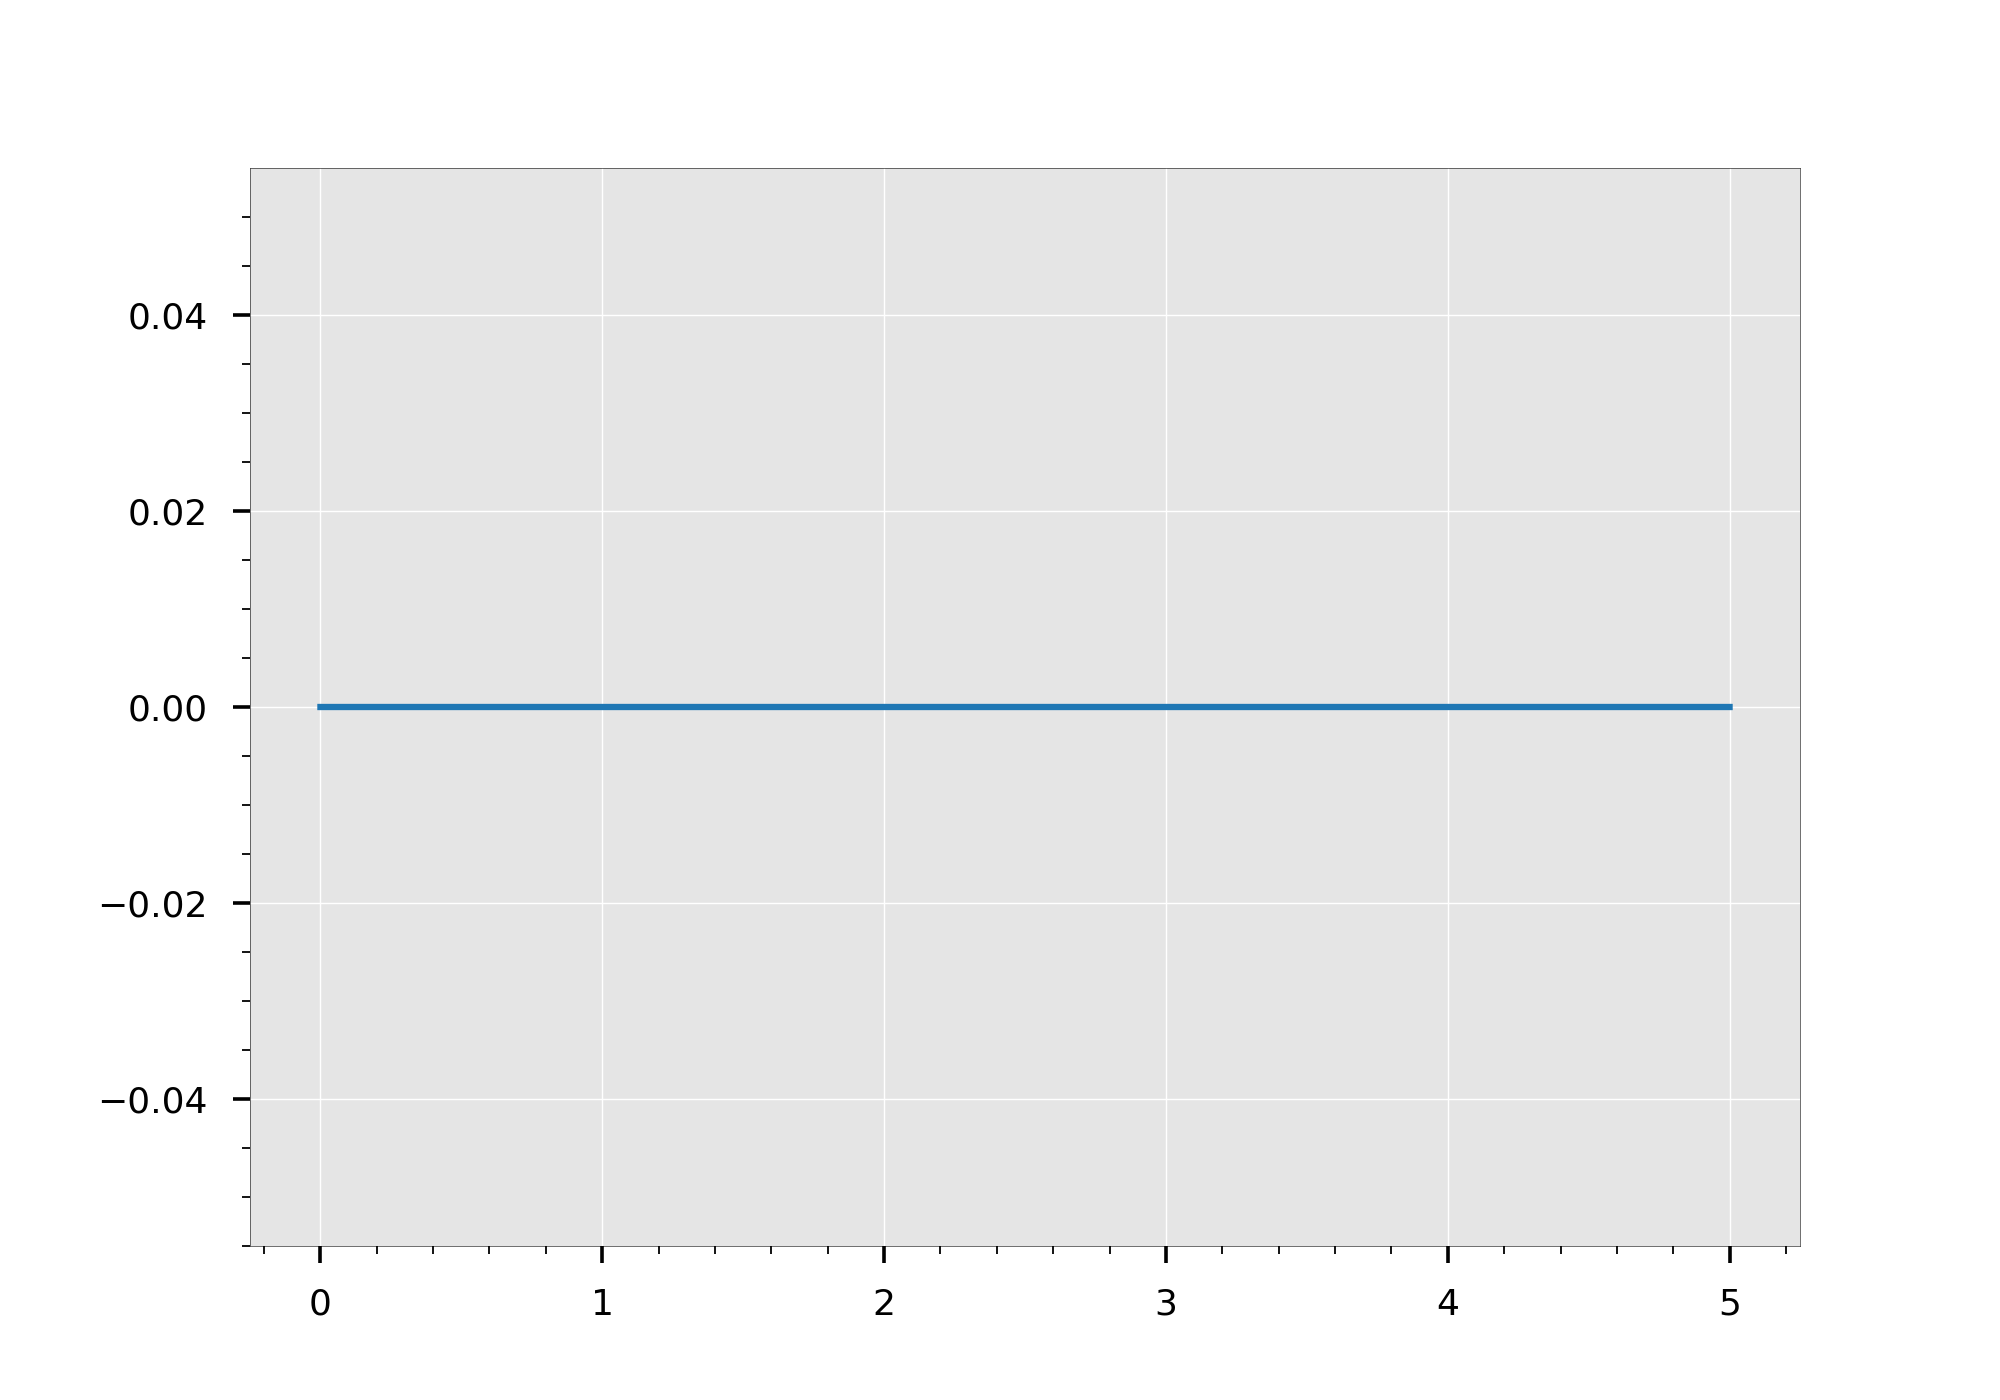

<IPython.core.display.Javascript object>


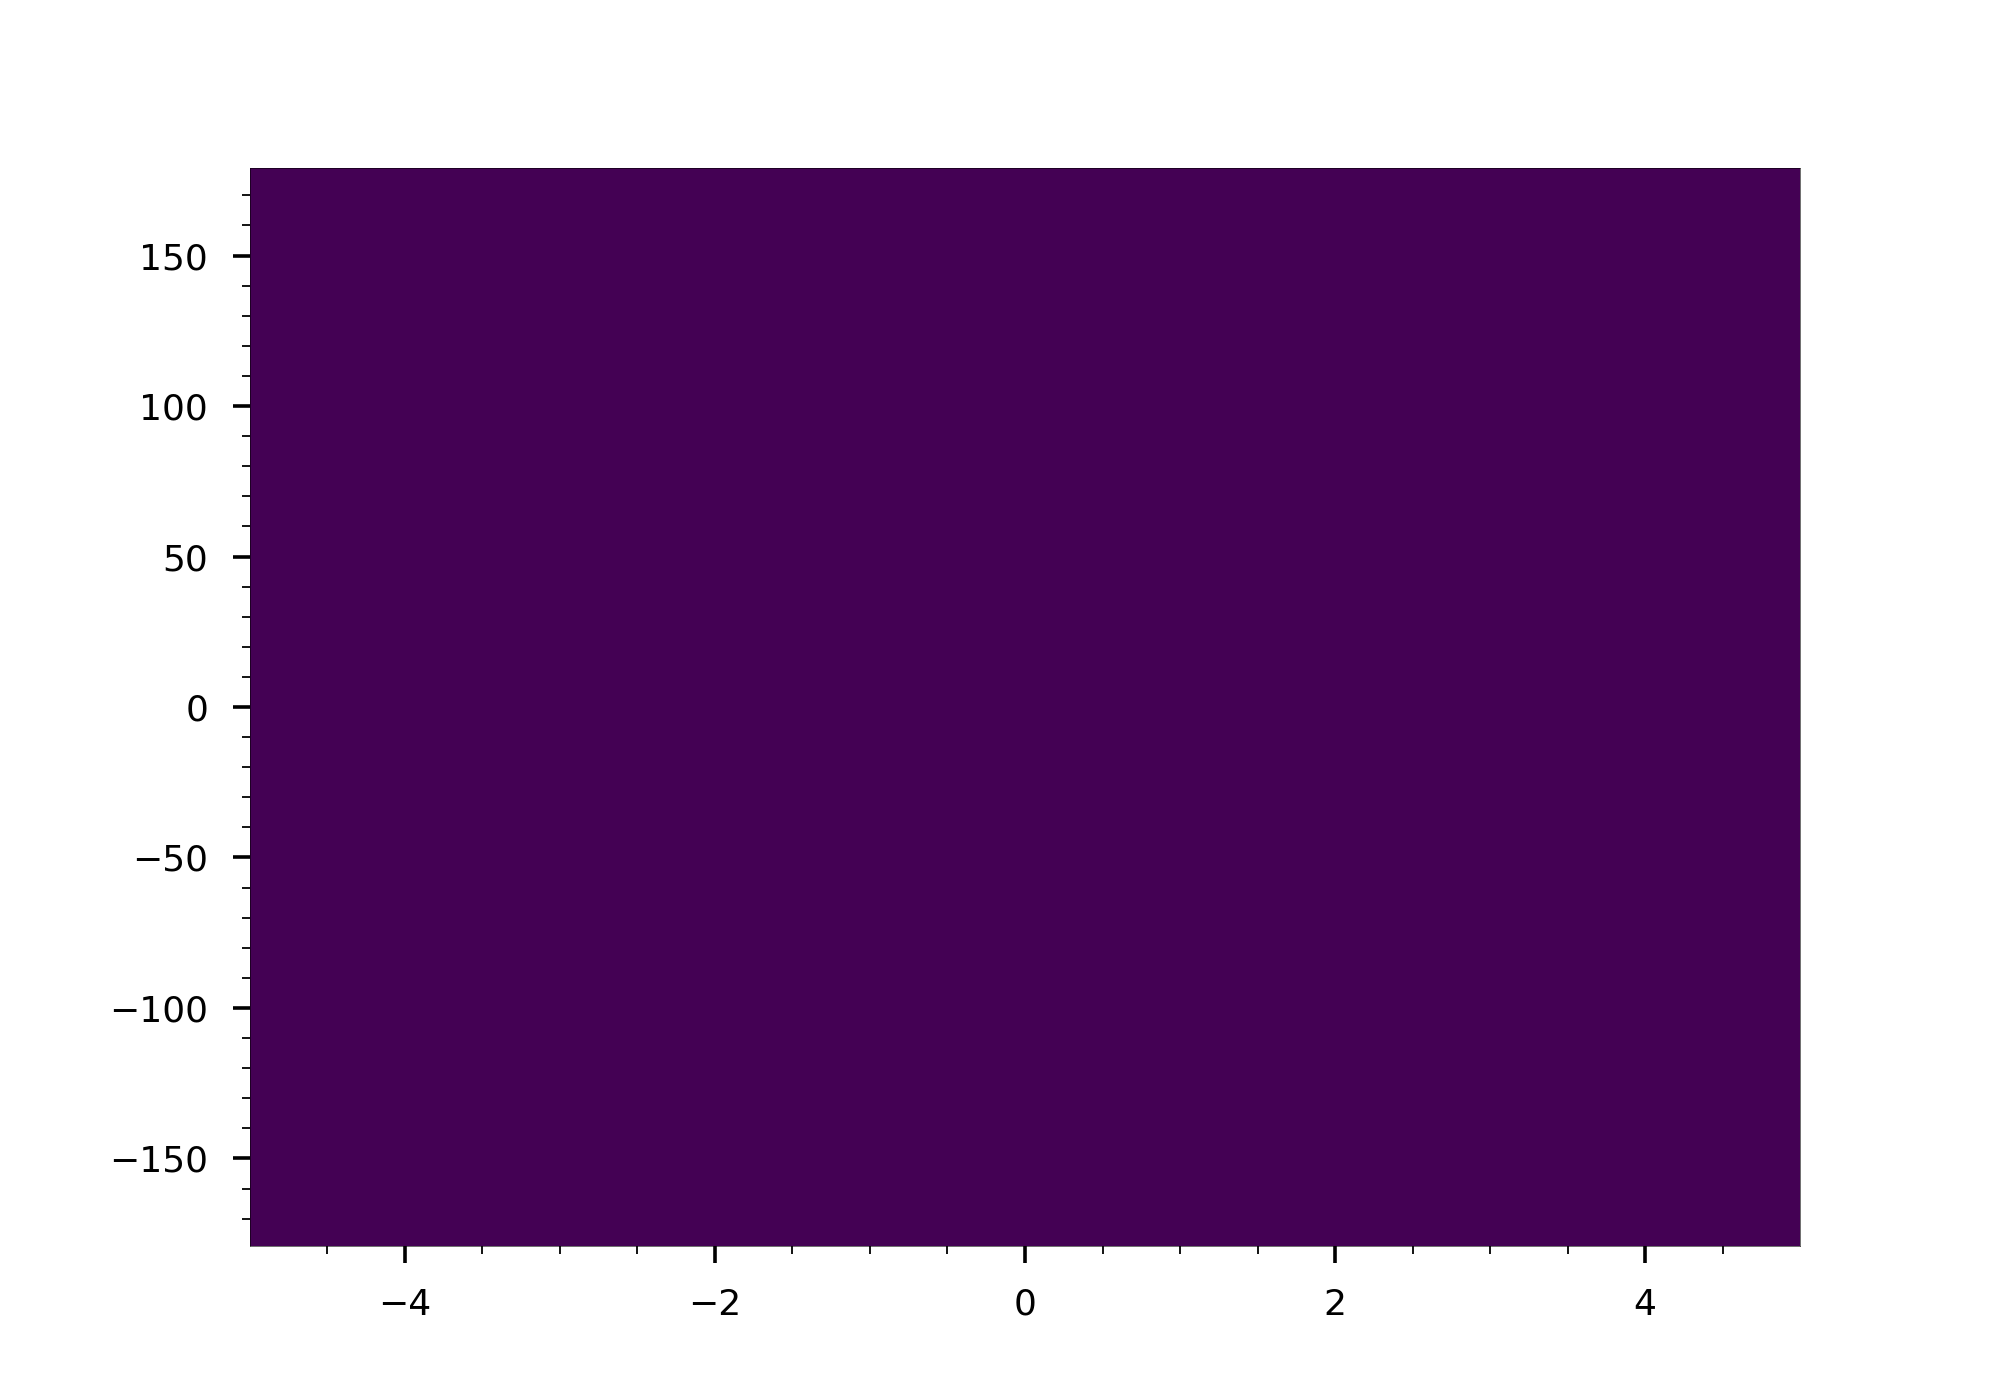

In [113]:
spec_file = SpecFile( os.path.join(spec_path, 'direct_beam_full') ) #LaB6_2

img_fnames = sorted(fnmatch.filter(os.listdir(img_path), '*direct_beam_full_scan1*.raw'))
pdi_fnames = [f'{img_fname}.pdi' for img_fname in img_fnames
             if os.path.exists( os.path.join(pdi_path, f'{img_fname}.pdi') )]

if len(pdi_fnames) != len(img_fnames):
    print('PDI files for all images not present..')
    
tths = [get_motor_val( os.path.join(pdi_path, f), 'TwoTheta' ) for f in pdi_fnames]

ai = pyFAI.load(os.path.join(path, 'direct_beam_scan3_poni.poni'))
for img_fname, tth in zip(img_fnames[40:41], tths[40:41]):
    print(img_fname)
    
    ais, imgs = [], []
    img = read_image_file( os.path.join(img_path, img_fname), flip=True, return_float=True )
    ai_tth = deepcopy(ai)
    ai_tth.rot2 += tth
    
    imgs.append(img), ais.append(ai_tth)
    
mg = MultiGeometry(ais, unit="2th_deg", radial_range=(-5, 5))

x, ii = mg.integrate1d(imgs, 5000)
qChi2d = mg.integrate2d(imgs, 5000, 200) ### best to check the number of points in chi and tth here
plt.figure()
plt.plot(x, ii)

ii, q, chi = qChi2d
plt.figure()
plt.pcolormesh(q, chi, ii)